In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import neurd

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [4]:
from mesh_tools import trimesh_utils as tu
from datasci_tools import ipyvolume_utils as ipvu
from neurd import neuron_visualizations as nviz
from pathlib import Path

In [5]:
segment_id = 864691134917511946

# Load the appropriate volume data inferface object

In [105]:
from neurd.vdi_microns import volume_data_interface as vdi
vdi.set_parameters_for_directory_modules()

In [7]:
synapse_filepath = str(Path(f'./{segment_id}_synapses.csv').absolute())
synapse_filepath

'/neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/864691134917511946_synapses.csv'

In [8]:
from datasci_tools import pandas_utils as pu
df = pu.csv_to_df(synapse_filepath)
df

,segment_id,segment_id_secondary,synapse_id,prepost,synapse_x,synapse_y,synapse_z,synapse_size
0,864691134917511946,864691131890533202,74184144,postsyn,130294,142230,26219,440
1,864691134917511946,864691131971669827,75022036,postsyn,129722,172364,24745,8428
2,864691134917511946,864691132108273063,70508178,postsyn,129296,134025,26165,26588
3,864691134917511946,864691132292869029,104897939,postsyn,145174,190248,26715,4500
4,864691134917511946,864691132404296761,67503404,postsyn,126052,183560,25913,2396
...,...,...,...,...,...,...,...,...
2310,864691134917511946,864691137019576686,92314268,postsyn,136376,184538,26155,5916
2311,864691134917511946,864691137196931393,78527771,postsyn,130688,192222,24419,15896
2312,864691134917511946,864691137196956737,105192008,postsyn,143492,188714,25058,7820
2313,864691134917511946,864691137196956737,113437532,postsyn,147378,190346,25751,708


In [9]:
vdi.set_synapse_filepath(
    synapse_filepath
)

# Data Prep: Loading mesh

In [10]:
mesh = vdi.fetch_segment_id_mesh(
    segment_id,
    plot = True
)
mesh

/usr/local/lib/python3.8/dist-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  warnings.warn(


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

<trimesh.Trimesh(vertices.shape=(420741, 3), faces.shape=(865980, 3))>

In [11]:
from datasci_tools import pipeline

products = pipeline.PipelineProducts()
products

# Step 1: Decimation

In [12]:
"""
NOTE: an already decimated mesh is used for the example
in order to speed up time, that's why the mesh_dec
object will be overwritten with original mesh object
"""

"\nNOTE: an already decimated mesh is used for the example\nin order to speed up time, that's why the mesh_dec\nobject will be overwritten with original mesh object\n"

In [13]:
decimation_parameters = dict(
    decimation_ratio =0.25,
)

In [14]:
import time

st = time.time()
mesh_decimated = tu.decimate(
    mesh,
    **decimation_parameters
)

print(f"Total time = {time.time() - st}")

xvfb-run -n 9133 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_69939.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_69939_decimated.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/decimation_meshlab_25224314.mls
Total time = 30.34231185913086


In [15]:
# saving any parameters used or output products for later use
products.set_stage_attrs(
    stage = "decimation",
    attr_dict = dict(
        decimation_parameters = decimation_parameters,
        segment_id = segment_id,
    ),
    
)

print(products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691134917511946,
  },
}



# Step 2: Soma Identification

In [16]:
from neurd import soma_extraction_utils as sm
soma_extraction_parameters = dict()

In [17]:
# could inspect the parameters of a certain category
from neurd import parameter_utils as paru
paru.category_param_from_module(
        module = sm,
        category = "glia",
)

{'glia_volume_threshold_in_um_global': 2500,
 'glia_n_faces_threshold_global': 400000,
 'glia_n_faces_min_global': 100000}

In [18]:
# overwritting decimated mesh because original was already decimated
mesh_decimated = mesh

In [19]:
mesh_decimated

<trimesh.Trimesh(vertices.shape=(420741, 3), faces.shape=(865980, 3))>

In [20]:
from neurd import neuron_visualizations as nviz

verbose = True

soma_products = sm.soma_indentification(
    mesh_decimated,
    verbose=verbose,
    **soma_extraction_parameters
)

Current Arguments Using (adjusted for decimation):
 large_mesh_threshold= 5000.0 
large_mesh_threshold_inner = 3250.0 
soma_size_threshold = 562.5 
soma_size_threshold_max = 75000.0
outer_decimation_ratio = 0.25
inner_decimation_ratio = 0.25
max_mesh_sized_filtered_away = 22500.0
xvfb-run -n 9649 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_28097.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_28097_remove_interior.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/remove_interior_467458.mls
removed temporary input file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_28097.off
removed temporary output file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_28097_remove_interior.off
/neurd_packages/NEURD/Applicati

  0%|          | 0/13 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.779125]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 6398 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/neuron_925766.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/neuron_925766_poisson.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_314512.mls
removed temporary input file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/neuron_925766.off
removed temporary output file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/neuron_925766_poisson.off
mesh.is_watertight = True
/neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_314512.mls is being deleted....
Inside sp

  0%|          | 0/1 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.5418655]
mesh.is_watertight = True
/neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_371419.mls is being deleted....
Inside sphere validater: ratio_val = 769.5128726957494
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(767, 3), faces.shape=(1534, 3))>, curr_side_len_check = True, curr_volume_check = False
perc_0_faces = 0.0
Going to run cgal segmentation with:
File: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/843_mesh 
clusters:3 
smoothness:0.2

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

mesh.is_watertight = True
/neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_134374.mls is being deleted....
Inside sphere validater: ratio_val = 769.5128726957494
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(767, 3), faces.shape=(1534, 3))>, curr_side_len_check = True, curr_volume_check = False
----- working on mesh after poisson #2: <trimesh.Trimesh(vertices.shape=(2914, 3), faces.shape=(5824, 3))>
xvfb-run -n 2551 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/d

  0%|          | 0/6 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.45577199999999995]
mesh.is_watertight = True
/neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_821874.mls is being deleted....
Inside sphere validater: ratio_val = 318.4759330340049
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(524, 3), faces.shape=(1040, 3))>, curr_side_len_check = True, curr_volume_check = False
perc_0_faces = 0.0019230769230769232
Going to run cgal segmentation with:
File: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/585_mesh 
clusters:3 
smoothness:0.2

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

mesh.is_watertight = True
/neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_868630.mls is being deleted....
Inside sphere validater: ratio_val = 318.4759330340049
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(524, 3), faces.shape=(1040, 3))>, curr_side_len_check = True, curr_volume_check = False
----- working on mesh after poisson #3: <trimesh.Trimesh(vertices.shape=(2561, 3), faces.shape=(5122, 3))>
xvfb-run -n 5178 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/d

  0%|          | 0/7 [00:00<?, ?it/s]


    --- On segmentation loop 1 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(210, 3), faces.shape=(418, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(210, 3), faces.shape=(418, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]


    --- On segmentation loop 2 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(127, 3), faces.shape=(252, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(127, 3), faces.shape=(252, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

----- working on mesh after poisson #4: <trimesh.Trimesh(vertices.shape=(2505, 3), faces.shape=(5006, 3))>
xvfb-run -n 4094 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/decimation_meshlab_25708400.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(627, 3), faces.shape=(1250, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(627, 3), faces.shape=(1250

  0%|          | 0/3 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.45000850000000003]
mesh.is_watertight = True
/neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_8518.mls is being deleted....
Inside sphere validater: ratio_val = 44.002011369429006
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(294, 3), faces.shape=(582, 3))>, curr_side_len_check = True, curr_volume_check = False
perc_0_faces = 0.0
Going to run cgal segmentation with:
File: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/517_mesh 
clusters:3 
smoothness:0.2

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

Could not find valid soma mesh in retry
----- working on mesh after poisson #5: <trimesh.Trimesh(vertices.shape=(2190, 3), faces.shape=(4376, 3))>
xvfb-run -n 8999 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/decimation_meshlab_25708400.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(549, 3), faces.shape=(1094, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(ve

  0%|          | 0/5 [00:00<?, ?it/s]


    --- On segmentation loop 1 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(230, 3), faces.shape=(454, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(230, 3), faces.shape=(454, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]


    --- On segmentation loop 2 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(108, 3), faces.shape=(207, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(108, 3), faces.shape=(207, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

----- working on mesh after poisson #6: <trimesh.Trimesh(vertices.shape=(2089, 3), faces.shape=(4174, 3))>
xvfb-run -n 6947 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/decimation_meshlab_25708400.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(523, 3), faces.shape=(1042, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(523, 3), faces.shape=(1042

  0%|          | 0/3 [00:00<?, ?it/s]


    --- On segmentation loop 1 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(265, 3), faces.shape=(523, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(265, 3), faces.shape=(523, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]


    --- On segmentation loop 2 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(174, 3), faces.shape=(340, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(174, 3), faces.shape=(340, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

----- working on mesh after poisson #7: <trimesh.Trimesh(vertices.shape=(2076, 3), faces.shape=(4148, 3))>
xvfb-run -n 2163 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/decimation_meshlab_25708400.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(520, 3), faces.shape=(1036, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(520, 3), faces.shape=(1036

  0%|          | 0/5 [00:00<?, ?it/s]


    --- On segmentation loop 1 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(198, 3), faces.shape=(389, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(198, 3), faces.shape=(389, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]


    --- On segmentation loop 2 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(198, 3), faces.shape=(389, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(198, 3), faces.shape=(389, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

----- working on mesh after poisson #8: <trimesh.Trimesh(vertices.shape=(1712, 3), faces.shape=(3420, 3))>
xvfb-run -n 704 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/decimation_meshlab_25708400.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(429, 3), faces.shape=(854, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(429, 3), faces.shape=(854, 3

  0%|          | 0/3 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.548969]
mesh.is_watertight = True
/neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_243126.mls is being deleted....
Inside sphere validater: ratio_val = 264.5780977148202
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(309, 3), faces.shape=(612, 3))>, curr_side_len_check = True, curr_volume_check = False
perc_0_faces = 0.0032679738562091504
Going to run cgal segmentation with:
File: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/249_mesh 
clusters:3 
smoothness:0.2

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

Could not find valid soma mesh in retry



 Total time for run = 151.67817878723145
Before Filtering the number of somas found = 1

---Performing Soma Mesh Backtracking to original mesh for poisson soma 0
backtrack_soma_size_threshold = 8000
xvfb-run -n 5237 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_99377.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_99377_fill_holes.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/fill_holes_684262.mls

---- meshlab output -----
QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-root'
Current Plugins Dir is: /meshlab/src/distrib/plugins 
Error While parsing the XML filter plugin descriptors: We are trying to load a xml file that does not correspond to any dll or javascript code; please delete all the spurious xml files
Error While parsing th

  0%|          | 0/19 [00:00<?, ?it/s]

Largest hole before segmentation = 195442.17366895775, after = 578941.165186773,

ratio = 2.9622120667128398, difference = 383498.9915178153
filtered_soma_list_components = [<trimesh.Trimesh(vertices.shape=(19848, 3), faces.shape=(39717, 3))>]
Not need to do a second pass because already found a soma


In [29]:
from datasci_tools import ipyvolume_utils as ipvu 
ipvu.plot_objects(
    meshes = soma_products.soma_meshes,
    meshes_colors="random",
)

/usr/local/lib/python3.8/dist-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  warnings.warn(


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [31]:
sm.plot_soma_products(
    mesh_decimated,
    soma_products = soma_products,
    verbose = True
)

# of somas = 1
# of glia = 0
# of nuclei = 15


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [32]:
soma_products.soma_extraction_parameters = soma_extraction_parameters
soma_products

In [33]:
products.set_stage_attrs(
    stage = "soma_identification",
    attr_dict = soma_products,
)

print(products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691134917511946,
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(15723, 3), faces.shape=(38825, 3))>, <trimesh.Trimesh(vertices.shape=(4348, 3), faces.shape=(8941, 3))>, <trimesh.Trimesh(vertices.shape=(1586, 3), faces.shape=(3510, 3))>, <trimesh.Trimesh(vertices.shape=(808, 3), faces.shape=(1812, 3))>, <trimesh.Trimesh(vertices.shape=(806, 3), faces.shape=(1809, 3))>, <trimesh.Trimesh(vertices.shape=(805, 3), faces.shape=(1808, 3))>, <trimesh.Trimesh(vertices.shape=(668, 3), faces.shape=(1502, 3))>, <trimesh.Trimesh(vertices.shape=(636, 3), faces.shape=(882, 3))>, <trimesh.Trimesh(vertices.shape=(534, 3), faces.shape=(1170, 3))>, <trimesh.Trimesh(vertices.shape=(2419, 3), faces.shape=(4893, 3))>, <trimesh.Trimesh(vertices.shape=(1665, 3), faces.shape=(2568, 3))>, <trimesh.Trimesh(vertices.shape=(1619, 3), faces

# Step 2b: Saving off pipeline products

In [34]:
from datasci_tools import system_utils as su
su.save_object(
    products,"products_up_to_soma_stage"
)

Saved object at /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/products_up_to_soma_stage.pkl
File size is 23.115166 MB
Cleared mesh: <trimesh.Trimesh(vertices.shape=(15723, 3), faces.shape=(38825, 3))>:140135515730464
Cleared mesh: <trimesh.Trimesh(vertices.shape=(4348, 3), faces.shape=(8941, 3))>:140135434862848
Cleared mesh: <trimesh.Trimesh(vertices.shape=(1586, 3), faces.shape=(3510, 3))>:140135434866208
Cleared mesh: <trimesh.Trimesh(vertices.shape=(808, 3), faces.shape=(1812, 3))>:140135434845056
Cleared mesh: <trimesh.Trimesh(vertices.shape=(806, 3), faces.shape=(1809, 3))>:140135434832096
Cleared mesh: <trimesh.Trimesh(vertices.shape=(805, 3), faces.shape=(1808, 3))>:140135434830944
Cleared mesh: <trimesh.Trimesh(vertices.shape=(668, 3), faces.shape=(1502, 3))>:140135434842704
Cleared mesh: <trimesh.Trimesh(vertices.shape=(636, 3), faces.shape=(882, 3))>:140135434882016
Cleared mesh: <trimesh.Trimesh(vertices.shape=(534, 3), faces.shape=(1170, 

# Step 3: Decomposition

In [76]:
from neurd import neuron

neuron_obj = neuron.Neuron(
    mesh = mesh,
    segment_id = segment_id, # don't need this explicitely if segment_id is already in products
    pipeline_products = products,
    suppress_preprocessing_print=False,
    suppress_output=False,
)

neuron_obj

--- 0) Having to preprocess the Neuron becuase no preprocessed data
Please wait this could take a while.....
Skipping the hole filling
limb_remove_mesh_interior_face_threshold = 0
use_meshafterparty = True
Using pre-computed somas: soma_mesh_list = [<trimesh.Trimesh(vertices.shape=(19848, 3), faces.shape=(39717, 3))>]
Soma List = [<trimesh.Trimesh(vertices.shape=(19848, 3), faces.shape=(39717, 3))>]
soma_mesh_list_centers = [array([ 553544.98545949,  749839.54254837, 1047338.92563482])]
Getting Glia and Nuclei Pieces Subtracted Away 0.3195199966430664
 Splitting mesh after soma cancellation 1.9733822345733643
# of split_meshes = 4
 Containing Mesh Indices 0.04058957099914551
containing_mesh_indices = {0: 0}
 non_soma_touching_meshes 9.5367431640625e-06
There were 3 pieces found after size threshold
 Finding inside pieces and non_soma_touching meshes 0.17301607131958008
soma_containing_meshes = {0: [0]}

-----Before combining multiple mesh pieces-----
soma_containing_meshes = {0: [0]}



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.85s/it]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 4.4449098110198975
connecting at the root
branches_touching_root = [26]
combining close nodes
combine_threshold = 700
length of Graph = 16119
After combining close endpoints max(kept_branches_idx) = 26, len(kept_branches_idx) = 26
empty_indices % = 0.0
 conflict_indices % = 0.0037420005192980313
Decomposing first pass: 19.722007751464844
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [69446, 13211, 560, 4351, 39123, 7604, 8184, 5666, 4868, 10053, 6639, 14717, 6182]
mesh_large_connectivity: 0.5354213714599609
Finding MAP candidates connected components: 0.00025844573974609375
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.44997644424438477
Grouping MP Sublimbs by Graph: 0.12204504013061523
Divinding into MP and MAP pieces: 1.1920928955078125e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.0260317325592041
inside skelet

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.44it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.8452982902526855
connecting at the root
branches_touching_root = [4]
combining close nodes
combine_threshold = 700
length of Graph = 4691
After combining close endpoints max(kept_branches_idx) = 4, len(kept_branches_idx) = 5
empty_indices % = 0.0
 conflict_indices % = 0.0027349400447391928
Decomposing first pass: 9.284111976623535
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [40613, 23255, 4748, 29033]
mesh_large_connectivity: 0.06847763061523438
Finding MAP candidates connected components: 0.00010633468627929688
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.09207773208618164
Grouping MP Sublimbs by Graph: 0.016802310943603516
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.012402057647705078
inside skeletonize_connected_branch and use_surface_after_CGAL=True, s

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.21it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.6374866962432861
branches_touching_root = [2]
combining close nodes
combine_threshold = 700
length of Graph = 4031
After combining close endpoints max(kept_branches_idx) = 14, len(kept_branches_idx) = 14
empty_indices % = 0.0
 conflict_indices % = 0.005704989637421167
Decomposing first pass: 4.367229223251343
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [1695, 3068, 35317]
mesh_large_connectivity: 0.02095508575439453
Finding MAP candidates connected components: 8.749961853027344e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.10999035835266113
Grouping MP Sublimbs by Graph: 0.034124135971069336
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.006999492645263672
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
k

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.45it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 1.09000825881958
branches_touching_root = [11]
combining close nodes
combine_threshold = 700
length of Graph = 8442
After combining close endpoints max(kept_branches_idx) = 42, len(kept_branches_idx) = 43
empty_indices % = 0.0
 conflict_indices % = 0.014541138066622153
Decomposing first pass: 8.815742015838623
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 6.461143493652344e-05
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.1457672119140625e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.04173779487609863
sbv[0].reshape(-1,3) = [[ 552945.2  757231.5 1044509. ]]
closest_sk_pt_coord BEFORE = [ 552509.3623345   757743.64268187 1044615.1083

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.62it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.2968101501464844
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 1200
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0
Decomposing first pass: 1.380030632019043
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [36429]
mesh_large_connectivity: 0.00014829635620117188
Finding MAP candidates connected components: 7.271766662597656e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.010648727416992188
Grouping MP Sublimbs by Graph: 4.029273986816406e-05
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.02540898323059082
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.74it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.1930851936340332
branches_touching_root = [0]


combining close nodes
combine_threshold = 700
length of Graph = 621
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0
Decomposing first pass: 0.6075599193572998
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [14570]
mesh_large_connectivity: 0.00014972686767578125
Finding MAP candidates connected components: 6.341934204101562e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.0047724246978759766
Grouping MP Sublimbs by Graph: 3.647804260253906e-05
Divinding into MP and MAP pieces: 1.1920928955078125e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.013363361358642578
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 3950 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applic

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 387.72it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.01539921760559082
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 67
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0
widths = [139.36593796]
width_median= 139.36593796435122
segment_widths_median = [139.36593796]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 421.58it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.045659542083740234
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 83
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0
widths = [139.26087382]
width_median= 139.26087381562508
segment_widths_median = [139.26087382]
Using the axon parameters
Decomposing first pass: 0.033167123794555664
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.5033950805664062e-05
Total time for MAP sublimb processing 1.9073486328125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9073486328125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving pha

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.20238685607910156
Floating 1: <trimesh.Trimesh(vertices.shape=(75, 3), faces.shape=(146, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.0067901611328125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 425.56it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.01726245880126953
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 15
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0
widths = [206.12509746]
width_median= 206.12509745657303
segment_widths_median = [206.12509746]
Decomposing first pass: 0.017492294311523438
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.0503997802734375e-05
Total time for MAP sublimb processing 1.9073486328125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.811981201171875e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.06945514678955078


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.2556949806949807
 conflict_indices % = 0.0015765765765765765
main_branch = 23


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.6242894056847546
 conflict_indices % = 0.0
main_branch = 9
Total time for stitching floating pieces = 8.223890781402588
Total time for Concept Networks = 5.861758232116699
Total time for all mesh and skeletonization decomp = 645.0455555915833
No soma volume ratios so computing them now
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 3321 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/neuron_196269.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/neuron_196269_poisson.of

In [ ]:
nviz.visualize_neuron(
    neuron_obj,
    limb_branch_dict="all"
)

# Calculate statistics

In [79]:
decomp_products = neuron_obj.calculate_decomposition_products(
    store_in_obj = True,
)

decomp_products

In [80]:
print(neuron_obj.pipeline_products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691134917511946,
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(15723, 3), faces.shape=(38825, 3))>, <trimesh.Trimesh(vertices.shape=(4348, 3), faces.shape=(8941, 3))>, <trimesh.Trimesh(vertices.shape=(1586, 3), faces.shape=(3510, 3))>, <trimesh.Trimesh(vertices.shape=(808, 3), faces.shape=(1812, 3))>, <trimesh.Trimesh(vertices.shape=(806, 3), faces.shape=(1809, 3))>, <trimesh.Trimesh(vertices.shape=(805, 3), faces.shape=(1808, 3))>, <trimesh.Trimesh(vertices.shape=(668, 3), faces.shape=(1502, 3))>, <trimesh.Trimesh(vertices.shape=(636, 3), faces.shape=(882, 3))>, <trimesh.Trimesh(vertices.shape=(534, 3), faces.shape=(1170, 3))>, <trimesh.Trimesh(vertices.shape=(2419, 3), faces.shape=(4893, 3))>, <trimesh.Trimesh(vertices.shape=(1665, 3), faces.shape=(2568, 3))>, <trimesh.Trimesh(vertices.shape=(1619, 3), faces

# Saving off neuron

In [81]:
vdi.save_neuron_obj(
    neuron_obj,
    verbose = True
)

Total time for soma meshes compression = 0.24038124084472656
Total time for insignificant_limbs,inside_pieces,non_soma_touching_meshes,not_processed_soma_containing_meshes compression = 1.2853989601135254
Total time for limb_meshes compression = 1.6682989597320557
    Starting Limb Correspondence Compression
Total time for new_limb_correspondence compression = 21.910419940948486
Cleared mesh: <trimesh.Trimesh(vertices.shape=(15723, 3), faces.shape=(38825, 3))>:140135515730464
Cleared mesh: <trimesh.Trimesh(vertices.shape=(4348, 3), faces.shape=(8941, 3))>:140135434862848
Cleared mesh: <trimesh.Trimesh(vertices.shape=(1586, 3), faces.shape=(3510, 3))>:140135434866208
Cleared mesh: <trimesh.Trimesh(vertices.shape=(808, 3), faces.shape=(1812, 3))>:140135434845056
Cleared mesh: <trimesh.Trimesh(vertices.shape=(806, 3), faces.shape=(1809, 3))>:140135434832096
Cleared mesh: <trimesh.Trimesh(vertices.shape=(805, 3), faces.shape=(1808, 3))>:140135434830944
Cleared mesh: <trimesh.Trimesh(vertic

'864691134917511946.pbz2'

# Reloading the Neuron

In [82]:
neuron_obj_rec = vdi.load_neuron_obj(
    segment_id = segment_id,
    mesh_decimated = mesh_decimated
)

Decompressing Neuron in minimal output mode...please wait


In [83]:
neuron_obj_rec['S0']._volume

1083063135379.983

In [84]:
neuron_obj = neuron_obj_rec

# Exporting Branch meshes

limb_name = L0

 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

No limb name was given so using L0 because was the limb in the first key


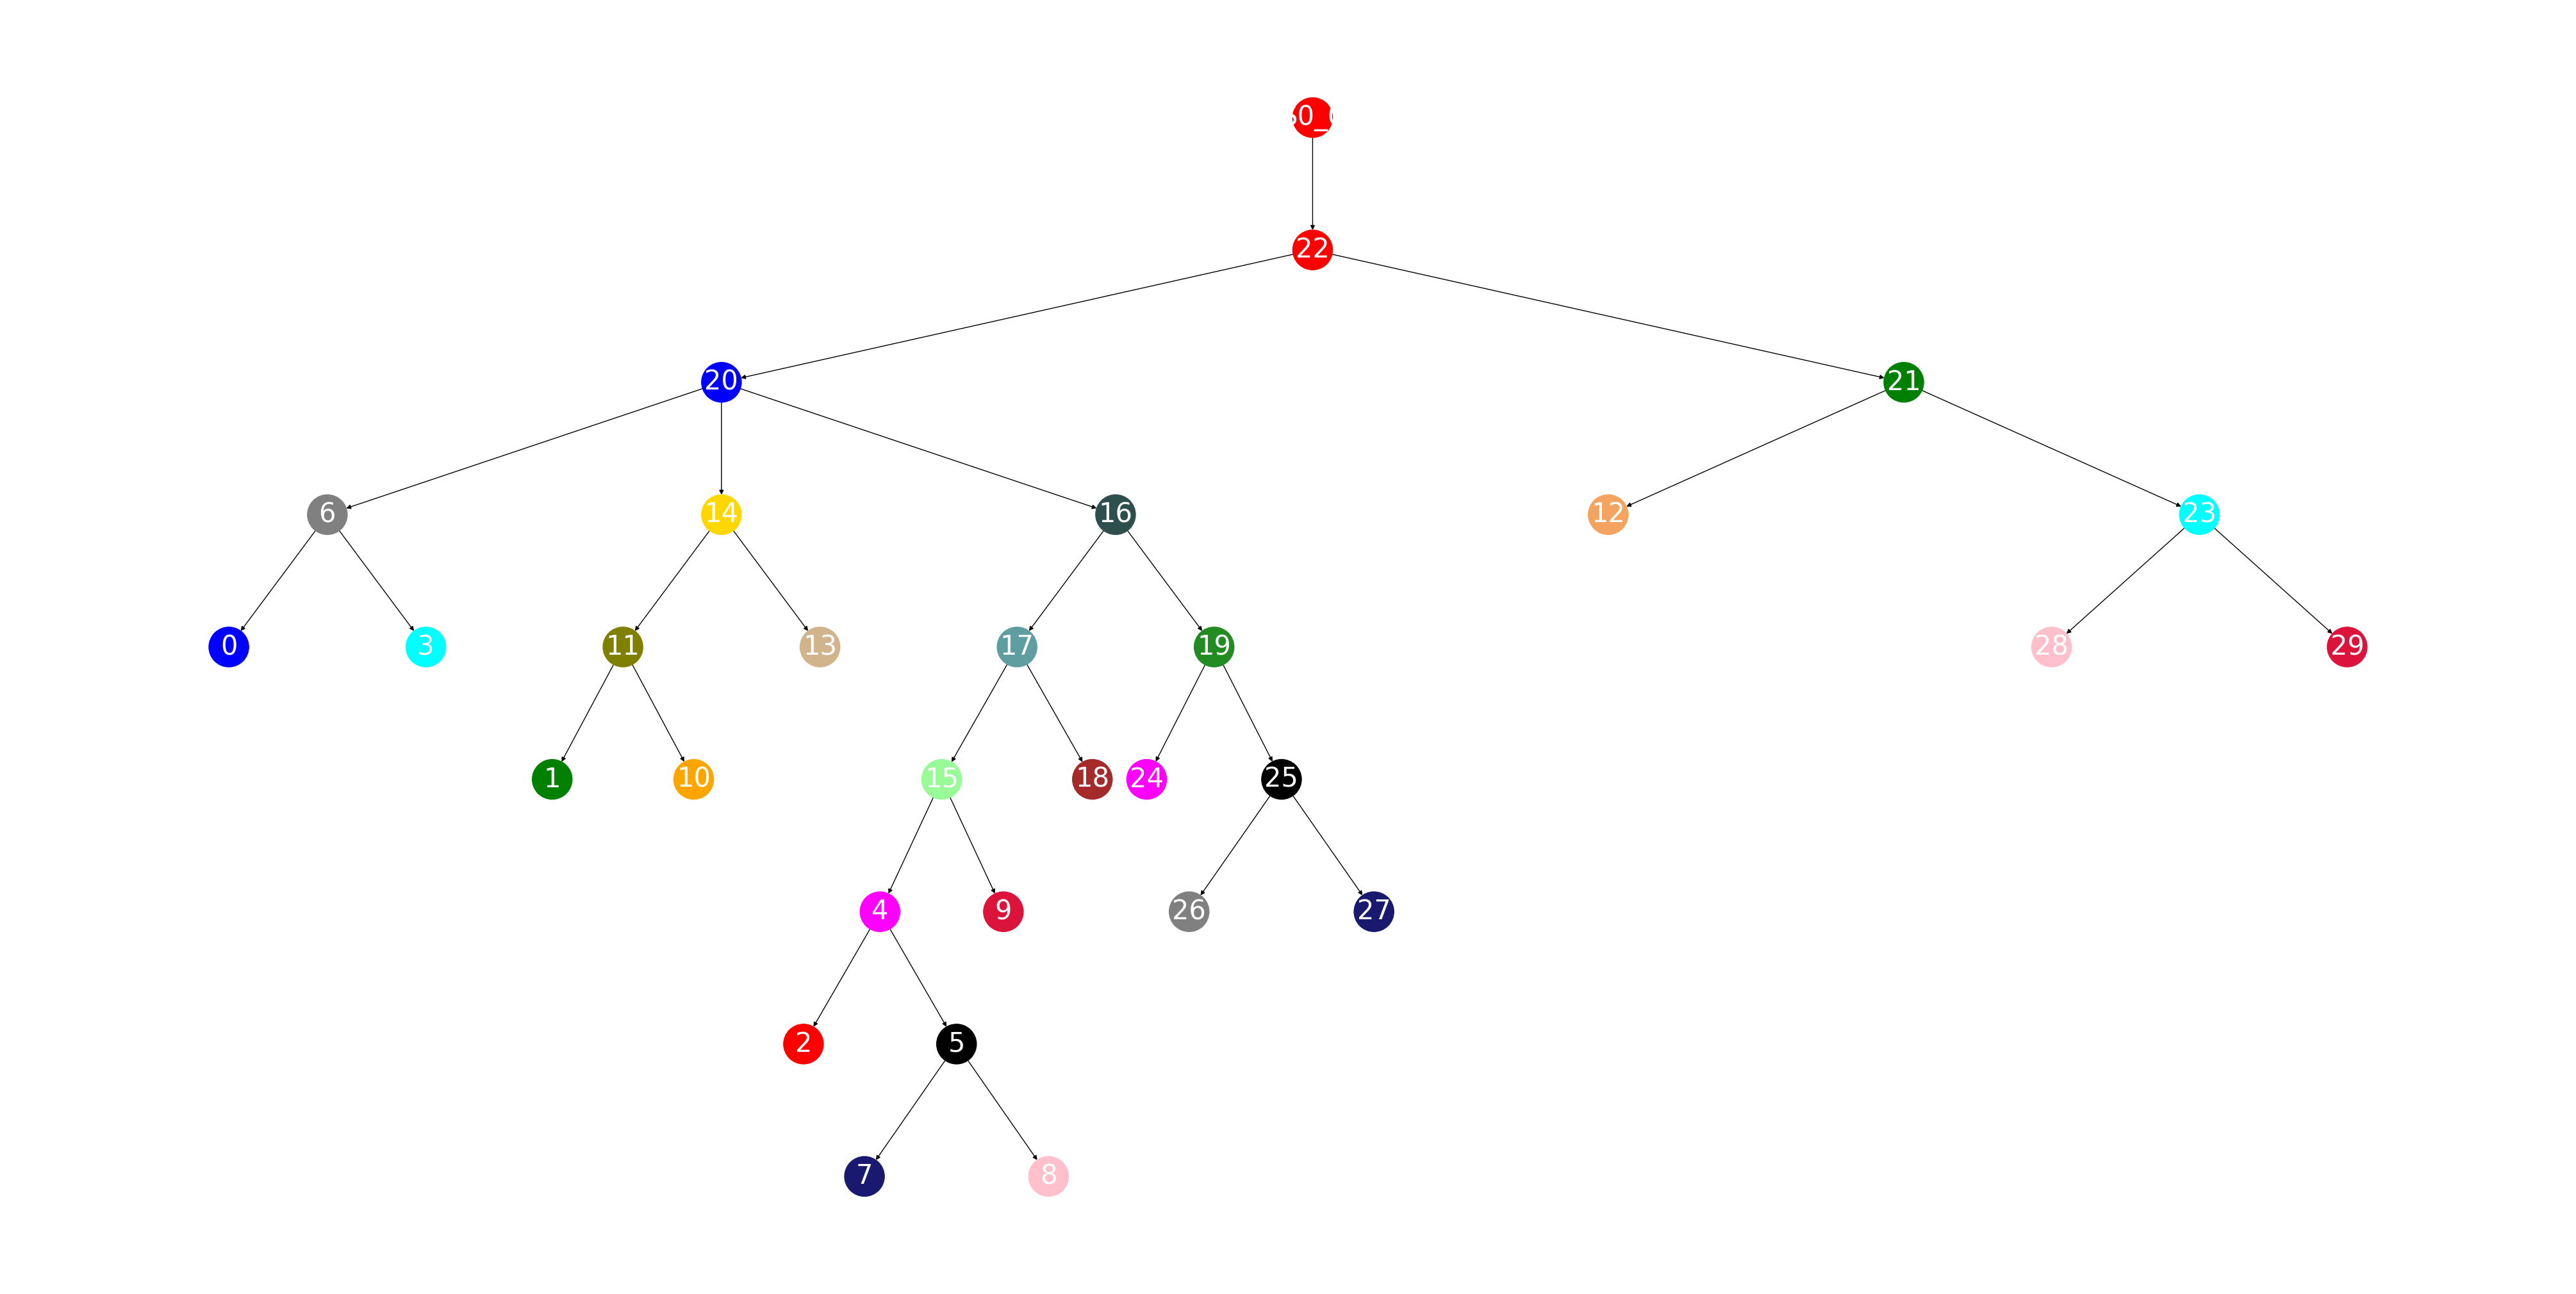

In [85]:
nviz.plot_limb(neuron_obj,0)

In [86]:
branch_idx = 3
limb_idx = 0

branch_mesh = neuron_obj[limb_idx][branch_idx].mesh
ipvu.plot_objects(branch_mesh)

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [87]:
_ = branch_mesh.export(f"{segment_id}_limb_{limb_idx}_branch_{branch_idx}.off")

# Step 4A: Multi Soma Split Suggestions

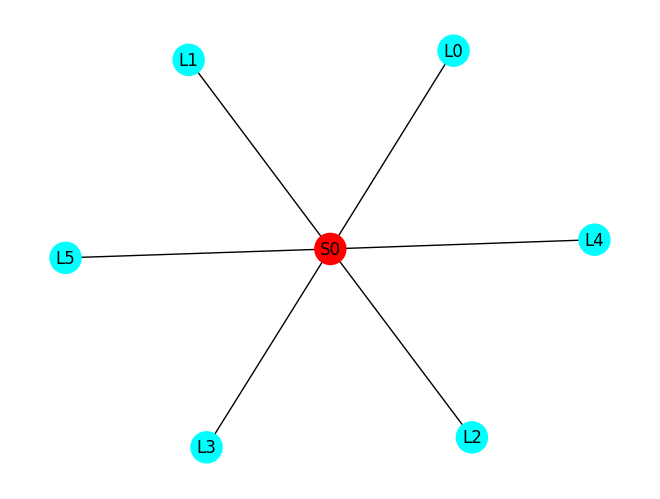

In [88]:
from neurd import neuron_visualizations as nviz
nviz.plot_soma_limb_concept_network(
    neuron_obj
)

In [89]:
multi_soma_split_parameters = dict()

In [90]:
_ = neuron_obj.calculate_multi_soma_split_suggestions(
    plot = True,
    store_in_obj = True,
    **multi_soma_split_parameters
)


In [91]:
neuron_obj.pipeline_products.multi_soma_split_suggestions.multi_soma_split_parameters = multi_soma_split_parameters

# Step 4B: Multi Soma Split Execution

In [106]:
neuron_list = neuron_obj.multi_soma_split_execution(
    verbose = False,
)

No error limbs to processs so just returning the original neuron


In [107]:
n1 = neuron_list[0]
print(n1.pipeline_products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691134917511946,
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(15723, 3), faces.shape=(38825, 3))>, <trimesh.Trimesh(vertices.shape=(4348, 3), faces.shape=(8941, 3))>, <trimesh.Trimesh(vertices.shape=(1586, 3), faces.shape=(3510, 3))>, <trimesh.Trimesh(vertices.shape=(808, 3), faces.shape=(1812, 3))>, <trimesh.Trimesh(vertices.shape=(806, 3), faces.shape=(1809, 3))>, <trimesh.Trimesh(vertices.shape=(805, 3), faces.shape=(1808, 3))>, <trimesh.Trimesh(vertices.shape=(668, 3), faces.shape=(1502, 3))>, <trimesh.Trimesh(vertices.shape=(636, 3), faces.shape=(882, 3))>, <trimesh.Trimesh(vertices.shape=(534, 3), faces.shape=(1170, 3))>, <trimesh.Trimesh(vertices.shape=(2419, 3), faces.shape=(4893, 3))>, <trimesh.Trimesh(vertices.shape=(1665, 3), faces.shape=(2568, 3))>, <trimesh.Trimesh(vertices.shape=(1619, 3), faces

# Step 5: Cell Typing

In [94]:
from neurd import neuron_pipeline_utils as npu

In [95]:
neuron_obj_axon = npu.cell_type_ax_dendr_stage(
    n1,
    mesh_decimated = mesh_decimated,
    plot_axon = False,
)


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 5


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 4


Number of segments: 4


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 4


Number of segments: 2


Number of segments: 2


Number of segme

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.94s/it]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 2.4262585639953613
branches_touching_root = [16]
combining close nodes
combine_threshold = 1300
length of Graph = 13106
After combining close endpoints max(kept_branches_idx) = 230, len(kept_branches_idx) = 190
empty_indices % = 0.0
 conflict_indices % = 0.05154251788018087
Decomposing first pass: 18.805663347244263
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 1.5020370483398438e-05
Total time for MAP sublimb processing 5.245208740234375e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.5033950805664062e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.013756752014160156
sbv[0].reshape(-1,3) = [[ 552945.2  757231.5 1044509. ]]
closest_sk_pt_coord BEFORE = [ 552495.72569604  757785.38871569 1044811.89960749]

In [96]:
print('hi')

hi


In [97]:
nviz.plot_axon(
    neuron_obj_axon
)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Autoproofreading Stage

About to do syn_density stats
syn_density_post = 0.8322168915736833
syn_density_head = 0.4066862956189458
syn_density_neck = 0.021473737591948646
syn_density_shaft = 0.31947662662307275
sk_length_synapse_density = 2281857.072630525
About to do spine_density stats
postsyn_limb_branch = {'L0': array([ 0,  1,  3,  4,  6,  9, 10, 11, 12, 13, 14, 15, 18, 19, 23, 24, 25,
       27]), 'L1': array([0, 1, 4, 7]), 'L2': array([ 6,  7, 13]), 'L4': array([0]), 'L5': array([0])}
sk_length = 2188504.897944939
# of spines = 990
Density = 0.4523636209037663
spine_density = 0.4523636209037663 (multiplier = 1000)
sk_length spine density = 2188504.897944939
Done stats
Not apply_hand_made_low_rules
For model: LogisticRegression(class_weight={'excitatory': 1, 'inhibitory': 1.5}) 
with features: ['syn_density_shaft', 'spine_density']
pred_class = excitatory, pred_class_label = excitatory
Total time for e/i calculations = 0.14179086685180664
baylor_e_i = excitatory

*****Using v7 Filters!!!


Current node sk

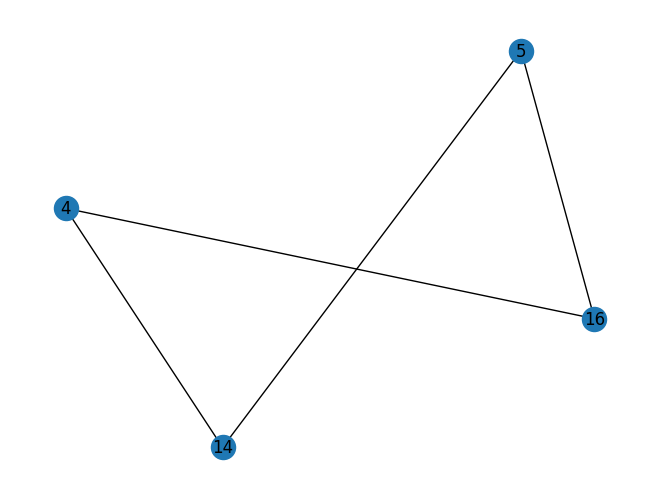

Performing global features query
Done with edge_df: 0.0011396408081054688
Performing Edge Query
After edge filter, # of rows = 2
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   5  14     23.88   54.243292               0.350831              0.000335   
1   5  16     23.63   14.943542               0.096651              0.000335   
2  14   4     52.16    3.360589               0.032397              0.000000   
3  16   4     22.12   65.826245               0.634585              0.000000   

   n_synapses_diff definite_partner_width_delete definite_partner_sk_delete  
0                1                          True                       None  
1                1                          None                       None  
2                0                         False                       None  
3                0                          True                       None  
Afer Globa

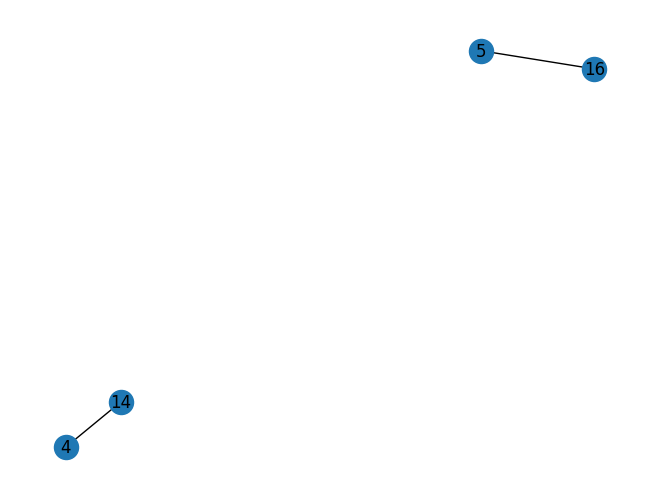

Performing node features query
Done with edge_df: 0.0007622241973876953
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   5  16     23.63   14.943542               0.096651              0.000335   
1  14   4     52.16    3.360589               0.032397              0.000000   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                1                       None                          None   
1                0                       None                         False   

  above_threshold_delete  
0                   None  
1                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   5  16     23.63   14.943542               0.096651              0.000335   
1  14   4     52.16    3.360589               0.032397             

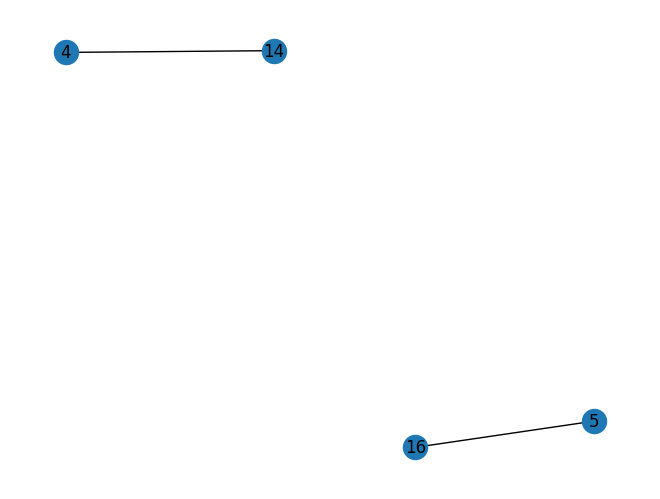

for upstream node 4, winning_node = 14, error_branches = [ 5 16]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (100.3705489424222) less than width_min(250)
Current node skip distance was 1810.8910031652524 but max skip distance was 2300.0
Current node skip distance was 1513.8828772852676 but max skip distance was 1513.8828772852676
Current node skip distance was 1665.1063381126273 but max skip distance was 1665.1063381126273
Current node skip distance was 2173.47663538046 but max skip distance was 2173.47663538046
Current node skip distance was 1549.1878421611673 but max skip distance was 1549.1878421611673
Current node skip distance was 1501.6117307514455 but max skip distance was 1501.6117307514455
Current node skip distance was 1738.578938656145 but max skip distance was 1906.3338798494087
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with 

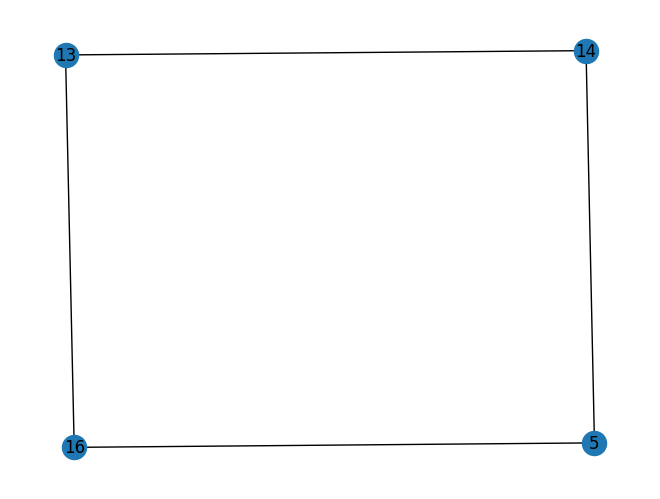

Performing global features query
Done with edge_df: 0.0009713172912597656
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   5  14     23.88   54.243292               0.350831              0.000335   
1   5  16     23.63   14.943542               0.096651              0.000335   
2  14  13     64.30   12.201000               0.108384              0.000000   
3  16  13     33.57   56.985835               0.506219              0.000000   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                1                       None                          None  
1                1                       None                          None  
2                0                       None                          None  
3                0                       None                          None  
Afer Globa

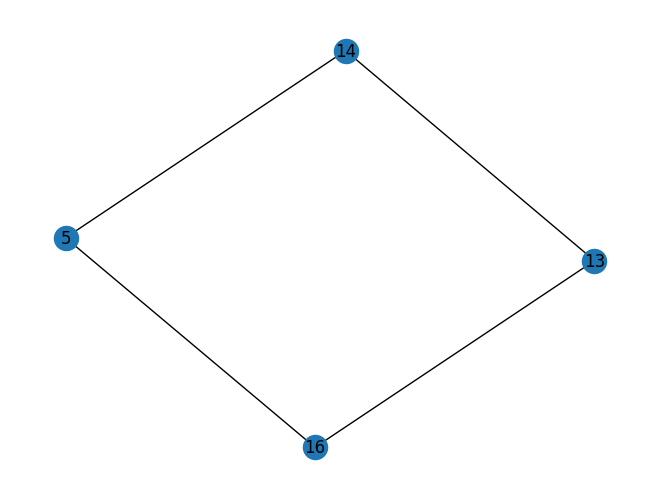

Performing node features query
Done with edge_df: 0.0008053779602050781
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   5  14     23.88   54.243292               0.350831              0.000335   
1   5  16     23.63   14.943542               0.096651              0.000335   
2  14  13     64.30   12.201000               0.108384              0.000000   
3  16  13     33.57   56.985835               0.506219              0.000000   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                1                       None                          None   
1                1                       None                          None   
2                0                       None                          None   
3                0                       None                          None   

  above_

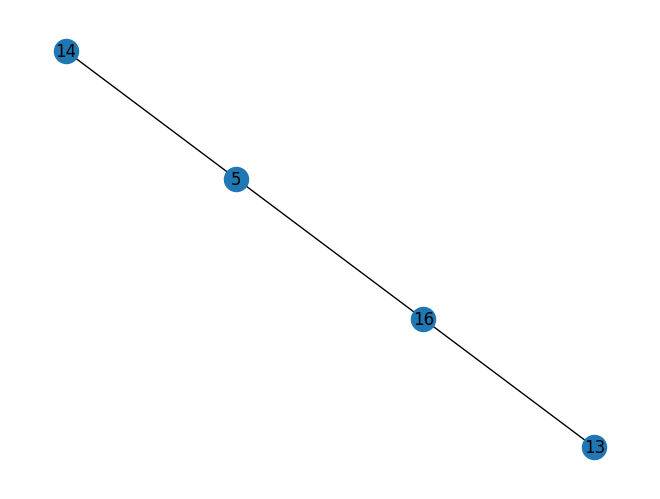

for upstream node 13, winning_node = None, error_branches = [ 5 14 16]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1584.8772872600919 but max skip distance was 1584.8772872600919
Current node skip distance was 1873.1557631602866 but max skip distance was 1873.1557631602866
Current node skip distance was 1711.619682816286 but max skip distance was 2173.47663538046
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0017578601837158203
Performing Edge Query
After edge filter, # of rows = 8
Exporting the edges
Deleteing edges only

--- Before Local Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   0   2     83.24   80.583125               1.102563              0.000201   
1   0   4     63.12   39.484485               0.540239              0.0000

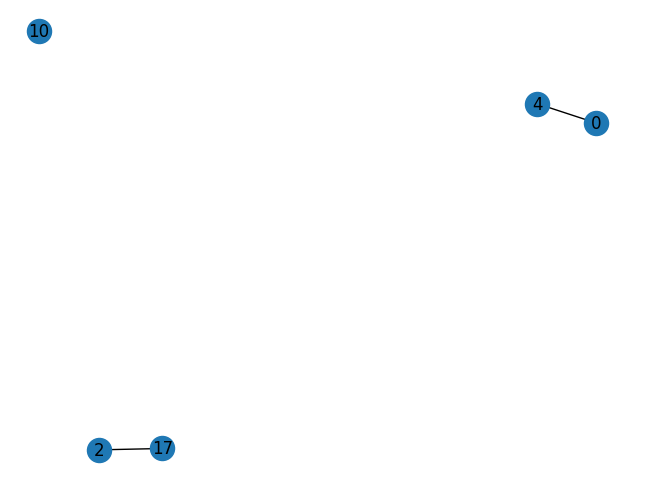

Performing global features query
Done with edge_df: 0.0009198188781738281
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
   u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  0   4     63.12   39.484485               0.540239              0.000000   
1  2  17      2.31   22.881465               0.174950              0.000201   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                0                       None                          None  
1                1                      False                          None  
Afer Global query: 
   u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  0   4     63.12   39.484485               0.540239              0.000000   
1  2  17      2.31   22.881465               0.174950              0.000201   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_de

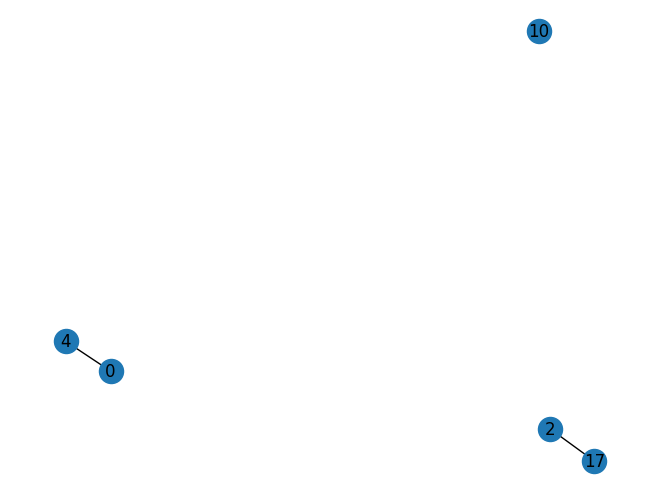

Performing node features query
Done with edge_df: 0.0008571147918701172
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
   u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  0   4     63.12   39.484485               0.540239              0.000000   
1  2  17      2.31   22.881465               0.174950              0.000201   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                0                       None                          None   
1                1                      False                          None   

  above_threshold_delete  
0                   None  
1                   None  
Afer Node query: 
   u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  0   4     63.12   39.484485               0.540239              0.000000   
1  2  17      2.31   22.881465               0.174950              0.000

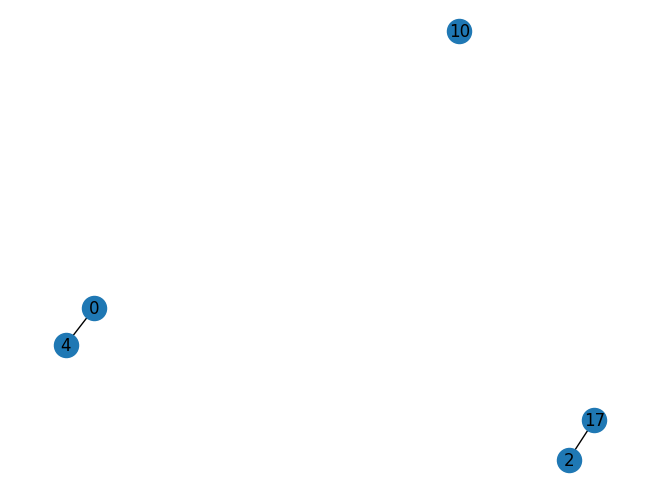

for upstream node 17, winning_node = 2, error_branches = [ 0  4 10]
Inside high_degree_false_positive_low_sibling_filter ****
Not exactly 2 downstream errors so returning
Current node skip distance was 1413.122703807576 but max skip distance was 1413.122703807576
Current node skip distance was 1780.438368687568 but max skip distance was 1780.438368687568
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0014514923095703125
Performing Edge Query
After edge filter, # of rows = 4
Exporting the edges
Deleteing edges only

--- Before Local Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  17  20     25.83   57.287599               0.438016              0.000000   
1  17  21     70.64    0.919469               0.007030              0.000189   
2  17  19     56.33   16.516485               0.112124              0.000000   

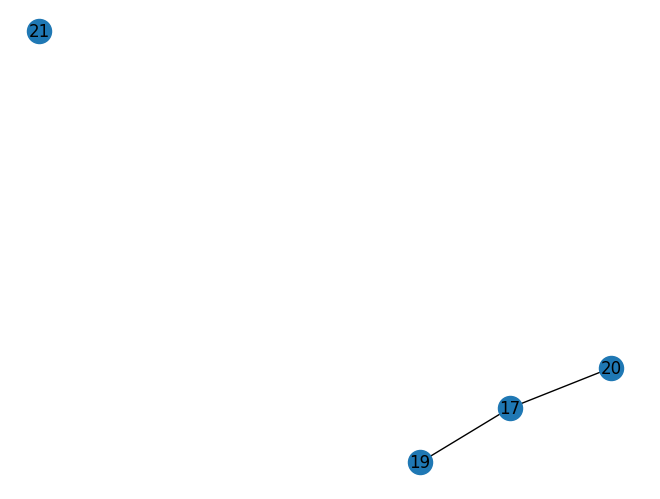

Performing global features query
Done with edge_df: 0.0007195472717285156
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  17  20     25.83   57.287599               0.438016                   0.0   
1  17  19     56.33   16.516485               0.112124                   0.0   

   n_synapses_diff  definite_partner_sk_delete  definite_partner_width_delete  
0                0                       False                           True  
1                0                        True                          False  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  17  20     25.83   57.287599               0.438016                   0.0   

   n_synapses_diff  definite_partner_sk_delete  definite_partner_width_delete  
0                0                       False             

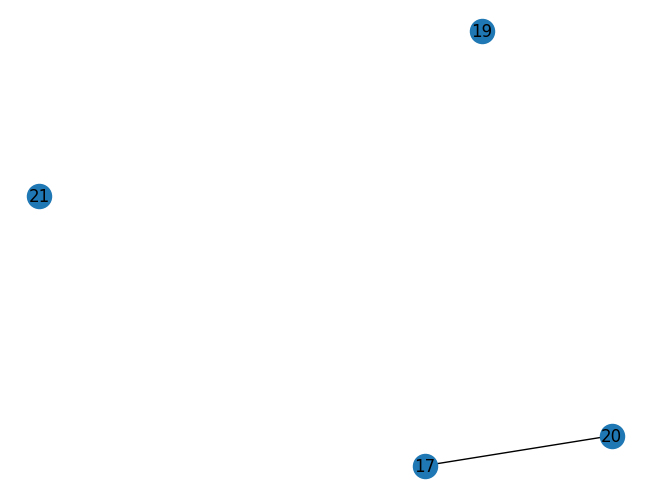

Performing node features query
Done with edge_df: 0.000728607177734375
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  17  20     25.83   57.287599               0.438016                   0.0   

   n_synapses_diff  definite_partner_sk_delete  definite_partner_width_delete  \
0                0                       False                           True   

  above_threshold_delete  
0                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  17  20     25.83   57.287599               0.438016                   0.0   

   n_synapses_diff  definite_partner_sk_delete  definite_partner_width_delete  \
0                0                       False                           True   

  above_threshold_delete  
0                   None  


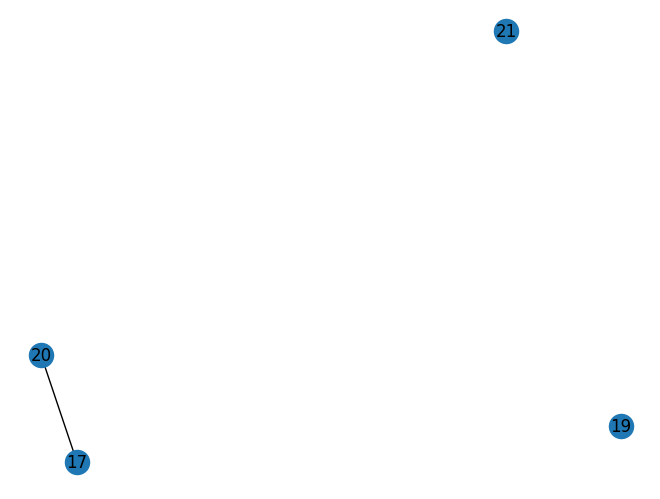

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1472.9213556462194 but max skip distance was 1472.9213556462194
Current node skip distance was 1707.788560665129 but max skip distance was 1781.6810712607046
Current node skip distance was 1628.36603139084 but max skip distance was 1628.36603139084
Current node skip distance was 1480.048301990361 but max skip distance was 1480.048301990361
Current node skip distance was 1533.0137920093266 but max skip distance was 1533.0137920093266
Current node skip distance was 1707.6220434493173 but max skip distance was 1780.438368687568
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0014538764953613281
Performing Edge Query
After edge filter, # of rows = 9
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u   v  sk_angle  wid

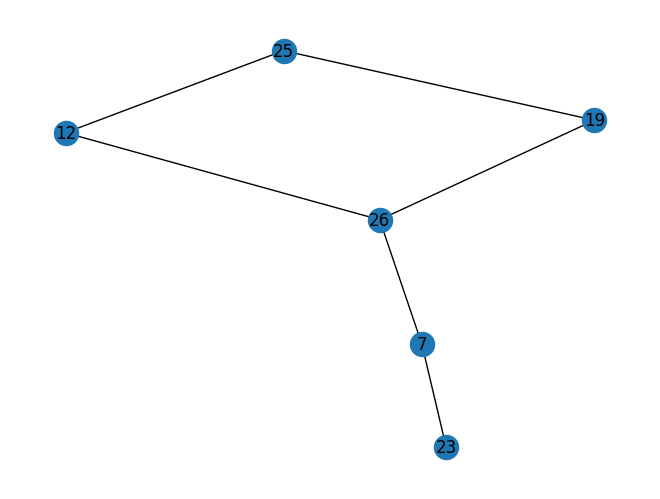

Performing global features query
Done with edge_df: 0.0012323856353759766
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   7  23     13.03    8.120298               0.097445              0.000084   
1   7  26     45.19   13.405755               0.160872              0.000197   
2  12  26     29.39   10.460680               0.130129              0.000281   
3  12  25     43.29   49.442475               0.380827              0.000278   
4  19  26     59.91   77.379073               0.525298              0.000281   
5  19  25     32.65   17.475918               0.134607              0.000278   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                1                      False                          None  
1                1                       True                          None  
2     

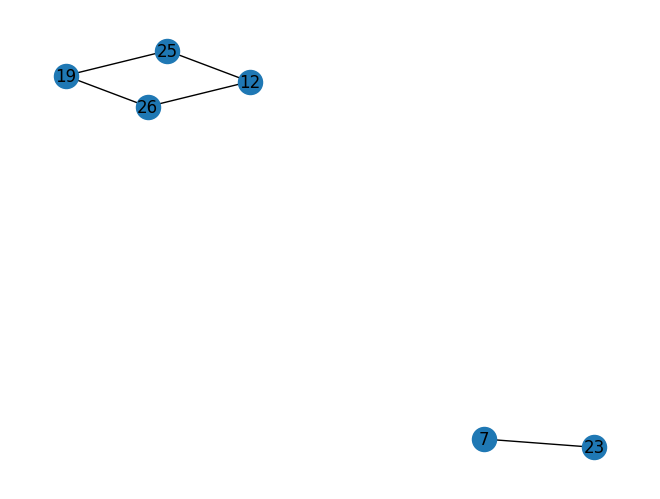

Performing node features query
Done with edge_df: 0.0009799003601074219
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   7  23     13.03    8.120298               0.097445              0.000084   
1  12  26     29.39   10.460680               0.130129              0.000281   
2  12  25     43.29   49.442475               0.380827              0.000278   
3  19  26     59.91   77.379073               0.525298              0.000281   
4  19  25     32.65   17.475918               0.134607              0.000278   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                1                      False                          None   
1                2                       None                          None   
2                1                       None                          None   
3       

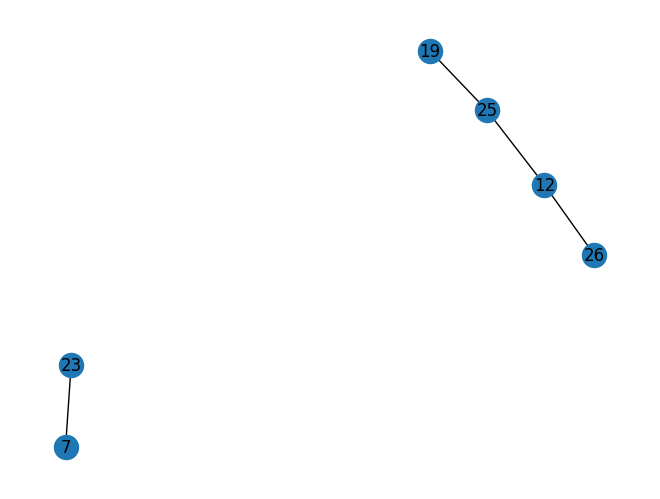

for upstream node 25, winning_node = None, error_branches = [ 7 12 19 23 26]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1458.0255655002047 but max skip distance was 1458.0255655002047
Current node skip distance was 1473.9583068018837 but max skip distance was 1473.9583068018837
Current node skip distance was 1439.2097328140164 but max skip distance was 1439.2097328140164
Current node skip distance was 1665.7633897842265 but max skip distance was 1707.6220434493173
Current node skip distance was 1483.8872757410506 but max skip distance was 1483.8872757410506
Current node skip distance was 1373.696244750608 but max skip distance was 1373.696244750608
Current node skip distance was 2051.8343766422095 but max skip distance was 2051.8343766422095
Current node skip distance was 1404.8838081237225 but max skip distance was 1404.8838081237225
Current node skip distance was 1452.7036445270596 but max skip distance was 

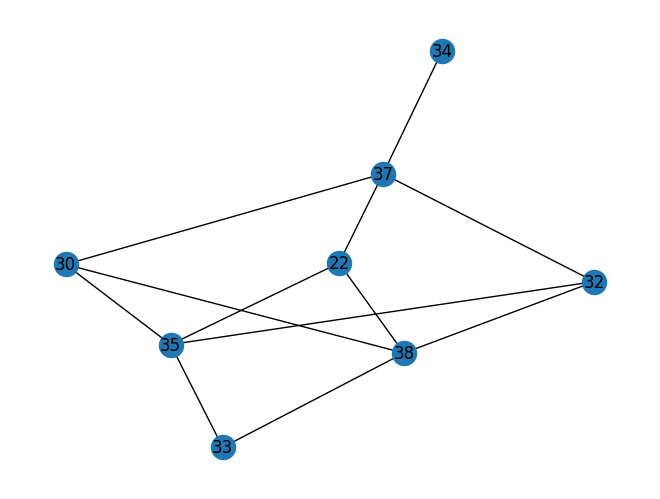

Performing global features query
Done with edge_df: 0.0015528202056884766
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   22  35     41.68   53.635734               0.484043              0.000000   
1   22  38     33.53   51.967919               0.468991              0.000000   
2   22  37     57.51   40.208845               0.266254              0.000197   
3   30  35     22.18   62.611100               0.522703              0.000000   
4   30  38     26.36   60.943285               0.508780              0.000000   
5   30  37     21.22   31.233479               0.206821              0.000197   
6   32  35     30.18   18.960832               0.249049              0.000000   
7   32  38     37.65   17.293017               0.227142              0.000000   
8   32  37     34.81   74.883747               0.495864              0.0

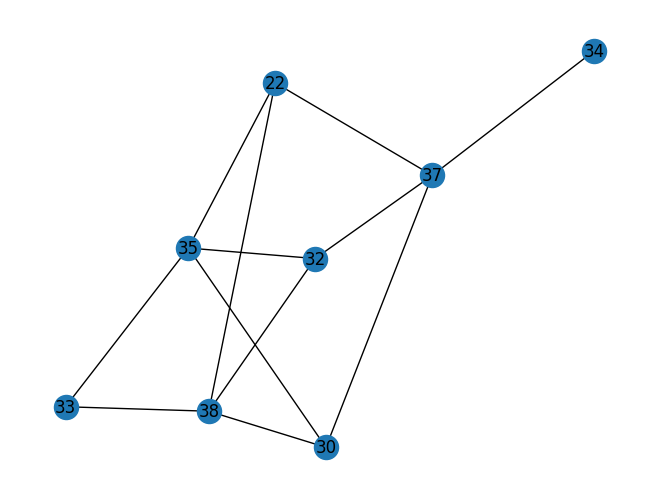

Performing node features query
Done with edge_df: 0.0011200904846191406
Performing Edge Query
After edge filter, # of rows = 2
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   22  35     41.68   53.635734               0.484043              0.000000   
1   22  38     33.53   51.967919               0.468991              0.000000   
2   22  37     57.51   40.208845               0.266254              0.000197   
3   30  35     22.18   62.611100               0.522703              0.000000   
4   30  38     26.36   60.943285               0.508780              0.000000   
5   30  37     21.22   31.233479               0.206821              0.000197   
6   32  35     30.18   18.960832               0.249049              0.000000   
7   32  38     37.65   17.293017               0.227142              0.000000   
8   32  37     34.81   74.883747               0.495864              0.00019

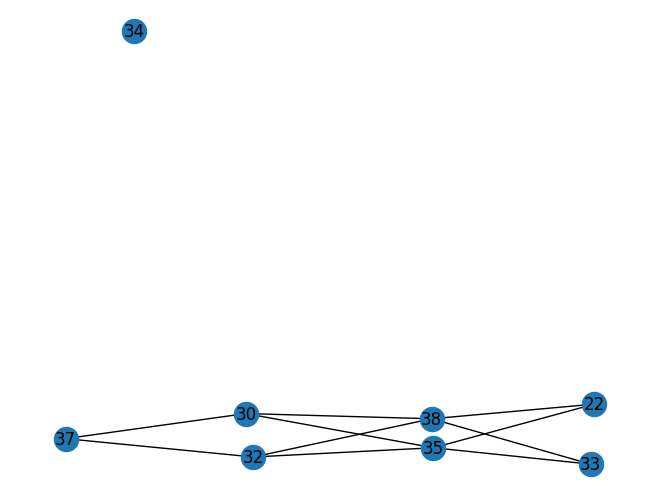

for upstream node 37, winning_node = None, error_branches = [22 30 32 33 34 35 38]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1411.8330370166711 but max skip distance was 1411.8330370166711
Current node skip distance was 1420.3496711923483 but max skip distance was 1420.3496711923483
Current node skip distance was 1548.4458537261655 but max skip distance was 1548.4458537261655
Current node skip distance was 1621.3044696309726 but max skip distance was 2300.0
Current node skip distance was 1763.4735386570042 but max skip distance was 1763.4735386570042
Current node skip distance was 1806.1698114568526 but max skip distance was 2194.6320494015
Current node skip distance was 1522.4348593997124 but max skip distance was 1522.4348593997124
Current node skip distance was 1413.411712631187 but max skip distance was 1413.411712631187
Current node skip distance was 1540.31184287528 but max skip distance was 1763.473538

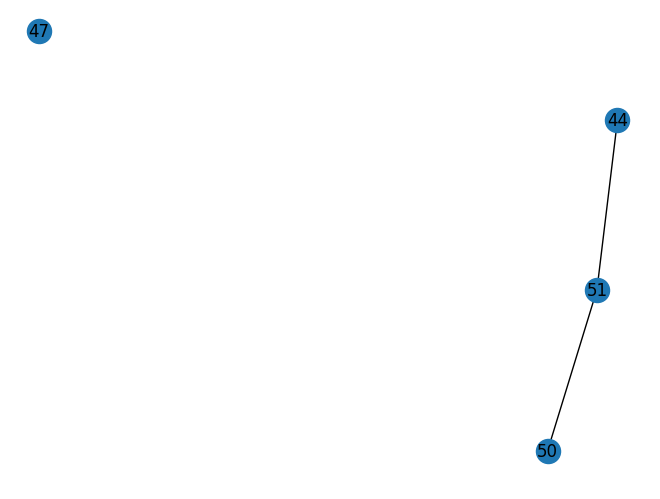

Performing global features query
Done with edge_df: 0.0007145404815673828
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  44  51     43.30  141.860633               0.497592              0.000244   
1  50  51     38.68  112.871744               0.395910              0.000012   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                5                       None                          None  
1                2                       None                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  44  51     43.30  141.860633               0.497592              0.000244   
1  50  51     38.68  112.871744               0.395910              0.000012   

   n_synapses_diff definite_partner_sk_delete definite_partner_wi

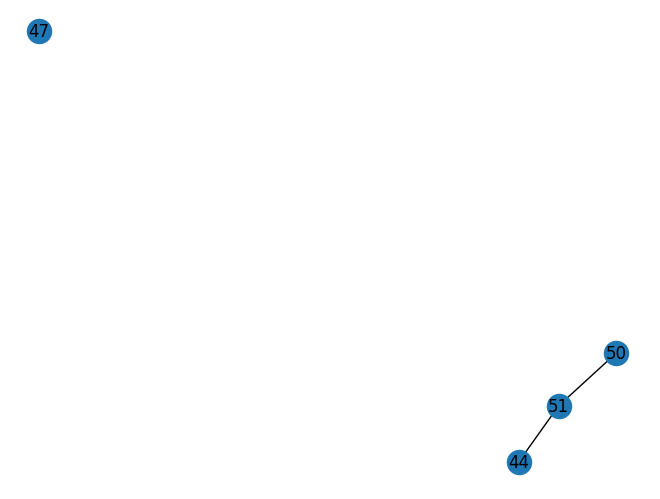

Performing node features query
Done with edge_df: 0.0009877681732177734
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  44  51     43.30  141.860633               0.497592              0.000244   
1  50  51     38.68  112.871744               0.395910              0.000012   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                5                       None                          None   
1                2                       None                          None   

  above_threshold_delete  
0                   None  
1                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  44  51     43.30  141.860633               0.497592              0.000244   
1  50  51     38.68  112.871744               0.395910             

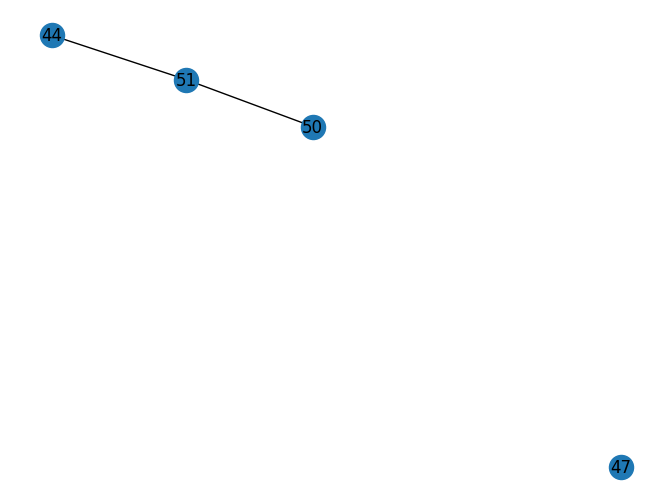

for upstream node 51, winning_node = None, error_branches = [44 47 50]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1386.728649079621 but max skip distance was 1386.728649079621
Current node skip distance was 1393.3073677849236 but max skip distance was 1393.3073677849236
Current node skip distance was 1537.4462799508556 but max skip distance was 1537.4462799508556
Current node skip distance was 1814.7349899312162 but max skip distance was 2300.0
Current node skip distance was 1560.0432454088057 but max skip distance was 1769.2843244318244
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.001795053482055664
Performing Edge Query
After edge filter, # of rows = 4
Exporting the edges
Deleteing edges only

--- Before Local Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  

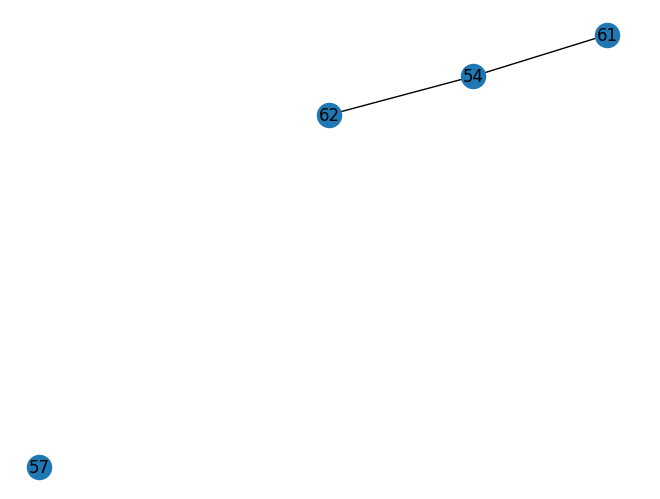

Performing global features query
Done with edge_df: 0.0007927417755126953
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  54  61     11.24   33.166932               0.372716                   0.0   
1  54  62     30.17   55.641131               0.625272                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                0                       None                          None  
1                0                       None                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  54  61     11.24   33.166932               0.372716                   0.0   
1  54  62     30.17   55.641131               0.625272                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_wi

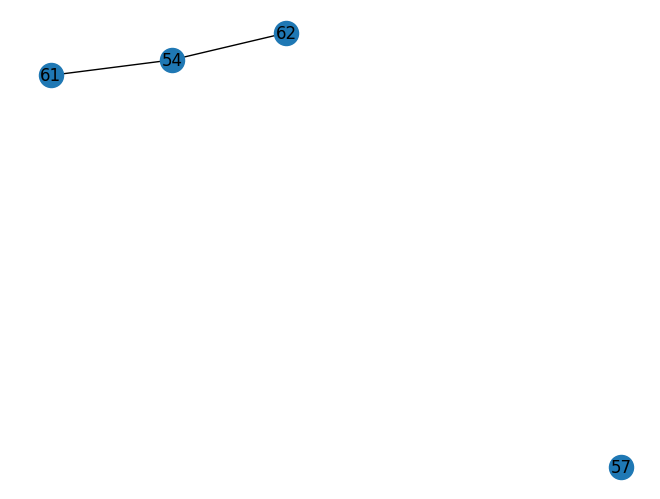

Performing node features query
Done with edge_df: 0.0007321834564208984
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  54  61     11.24   33.166932               0.372716                   0.0   
1  54  62     30.17   55.641131               0.625272                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                0                       None                          None   
1                0                       None                          None   

  above_threshold_delete  
0                   None  
1                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  54  61     11.24   33.166932               0.372716                   0.0   
1  54  62     30.17   55.641131               0.625272             

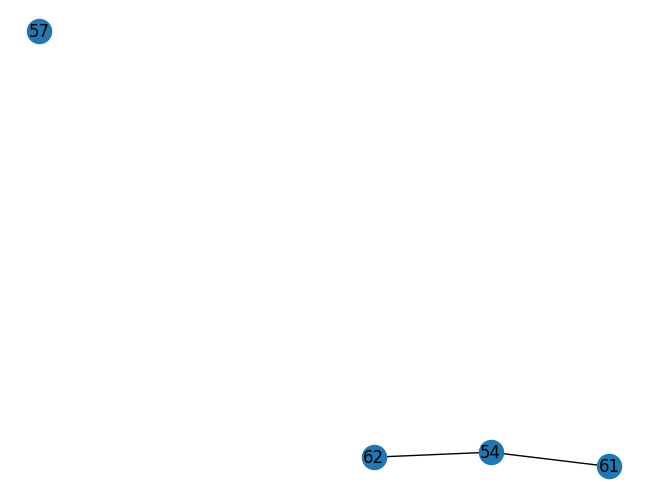

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1574.9559442404923 but max skip distance was 1806.1698114568526
Current node skip distance was 2025.9957408500904 but max skip distance was 2025.9957408500904
Current node skip distance was 1675.6418306795927 but max skip distance was 1675.6418306795927
Current node skip distance was 1769.2843244318244 but max skip distance was 1769.2843244318244
Current node skip distance was 2206.275736320395 but max skip distance was 2300.0
Current node skip distance was 2066.383612696065 but max skip distance was 2206.275736320395
Current node skip distance was 1606.498192758714 but max skip distance was 1606.498192758714
Current node skip distance was 1695.7236313871776 but max skip distance was 2066.383612696065
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with 

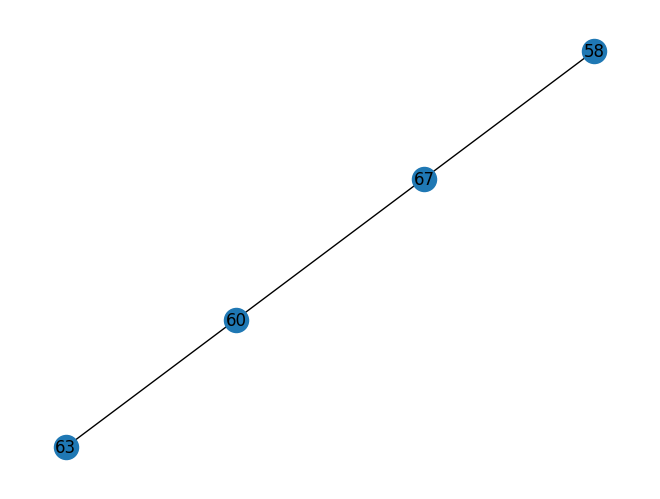

Performing global features query
Done with edge_df: 0.0011355876922607422
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  58  67     16.34   28.984245               0.228270              0.000000   
1  60  63     30.88   64.854546               0.575214              0.000199   
2  60  67     21.11   14.225056               0.112032              0.000000   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                0                       None                          None  
1                3                       None                          None  
2                0                       None                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  58  67     16.34   28.984245               0.228270              

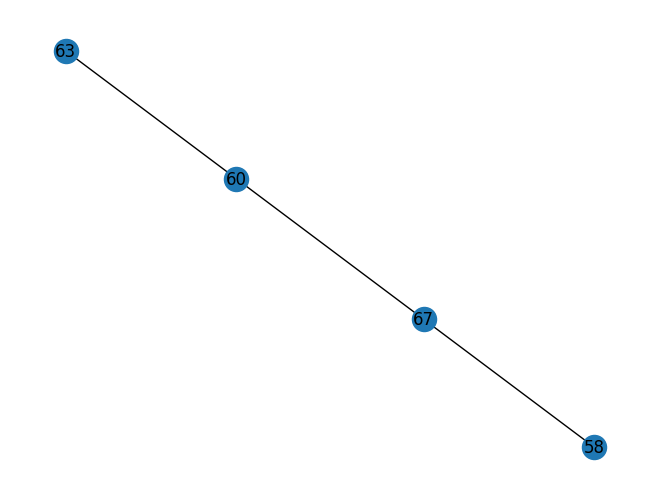

Performing node features query
Done with edge_df: 0.0007574558258056641
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  58  67     16.34   28.984245               0.228270              0.000000   
1  60  63     30.88   64.854546               0.575214              0.000199   
2  60  67     21.11   14.225056               0.112032              0.000000   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                0                       None                          None   
1                3                       None                          None   
2                0                       None                          None   

  above_threshold_delete  
0                   None  
1                   None  
2                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_di

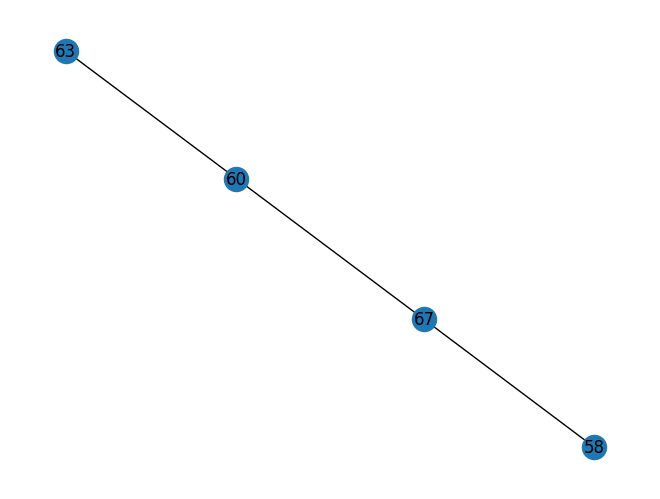

for upstream node 67, winning_node = None, error_branches = [58 60 63]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1953.9356343413888 but max skip distance was 1953.9356343413888
Current node skip distance was 1662.2622878608922 but max skip distance was 1953.9356343413888
Current node skip distance was 2300 but max skip distance was 2300.0
Current node skip distance was 1450.8454232028087 but max skip distance was 1450.8454232028087
Current node skip distance was 1527.1977673222736 but max skip distance was 1527.1977673222736
Current node skip distance was 1777.2547339923053 but max skip distance was 1777.2547339923053
Current node skip distance was 1519.2804968564342 but max skip distance was 1733.8433656023644
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.00152587890625
Perfor

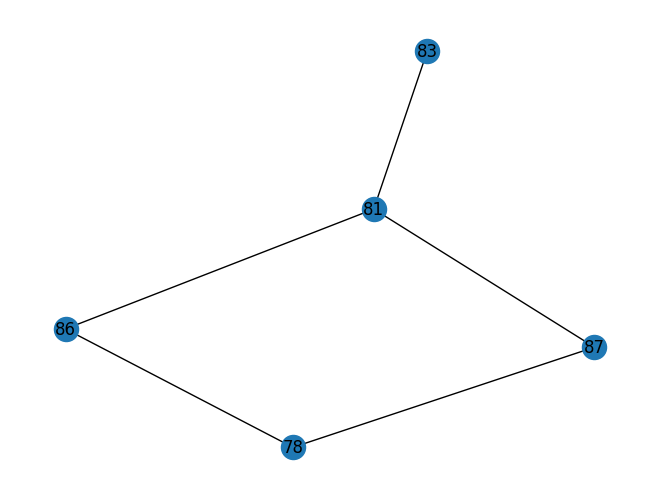

Performing global features query
Done with edge_df: 0.0008301734924316406
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  81  83     16.49   52.312036               0.624171                   0.0   
1  81  86     23.95    3.354177               0.040021                   0.0   
2  81  87     49.84   14.337994               0.171077                   0.0   
3  86  78     51.57    2.537229               0.029981                   0.0   
4  87  78     33.58   15.154942               0.179079                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                0                       None                          None  
1                0                       None                          None  
2                0                       None                          None  
3       

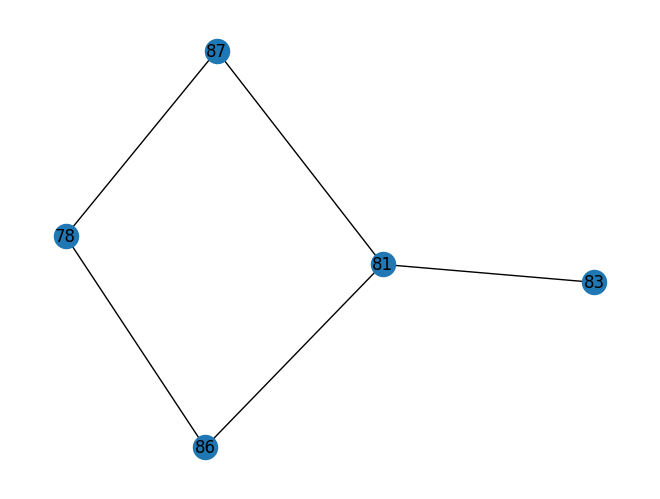

Performing node features query
Done with edge_df: 0.0008766651153564453
Performing Edge Query
After edge filter, # of rows = 2
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  81  83     16.49   52.312036               0.624171                   0.0   
1  81  86     23.95    3.354177               0.040021                   0.0   
2  81  87     49.84   14.337994               0.171077                   0.0   
3  86  78     51.57    2.537229               0.029981                   0.0   
4  87  78     33.58   15.154942               0.179079                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                0                       None                          None   
1                0                       None                          None   
2                0                       None                          None   
3       

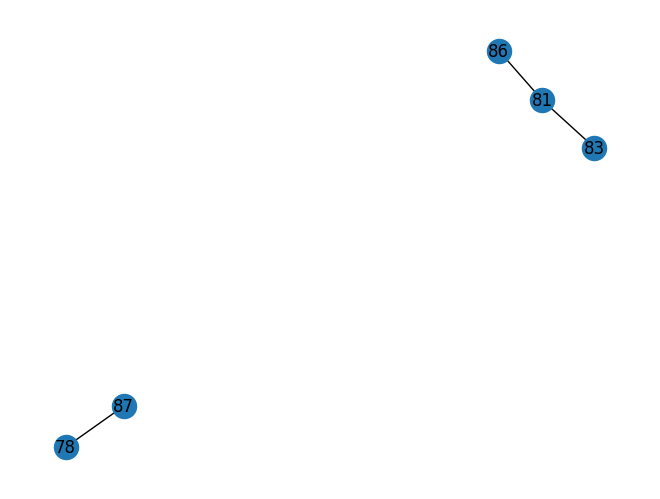

for upstream node 78, winning_node = 87, error_branches = [81 83 86]
Inside high_degree_false_positive_low_sibling_filter ****
Not exactly 2 downstream errors so returning
Current node skip distance was 1800.3225332671186 but max skip distance was 1814.7349899312162
Current node skip distance was 1536.0456374197795 but max skip distance was 1536.0456374197795
Current node skip distance was 1515.8765468973068 but max skip distance was 1515.8765468973068
Current node skip distance was 2090.3190924848477 but max skip distance was 2090.3190924848477
Current node skip distance was 1733.8433656023644 but max skip distance was 1733.8433656023644
Current node skip distance was 1336.8129747714922 but max skip distance was 2090.3190924848477
Current node skip distance was 1529.8522860692512 but max skip distance was 1529.8522860692512
Current node skip distance was 1456.1349055998858 but max skip distance was 1692.533653628503
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage 

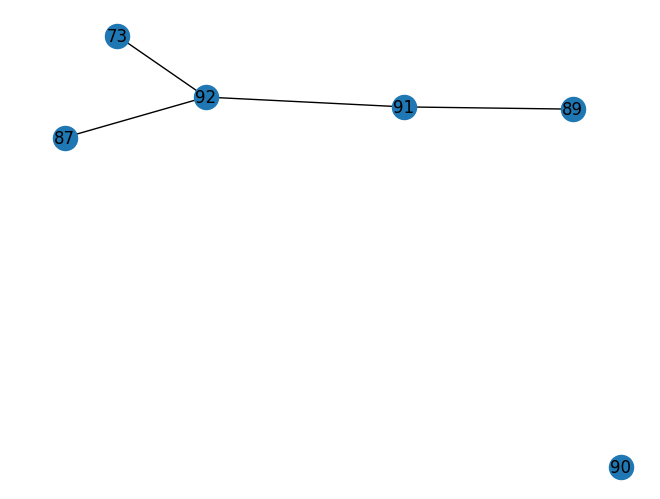

Performing global features query
Done with edge_df: 0.0011396408081054688
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  73  92     10.84    5.038227               0.073871              0.000174   
1  89  91     64.64   36.084095               0.285910              0.000000   
2  91  92     49.21   16.882853               0.187329              0.000000   
3  92  87     12.25    3.768751               0.054248              0.000000   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                2                       None                          None  
1                0                       None                          None  
2                0                       None                          None  
3                0                       None                          None  
Afer Globa

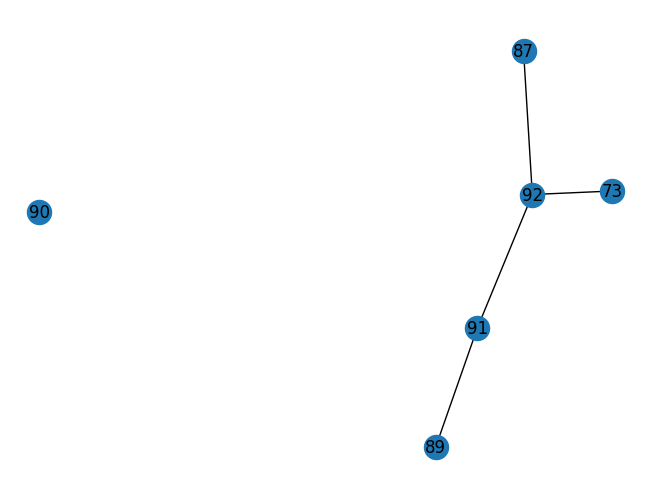

Performing node features query
Done with edge_df: 0.0011653900146484375
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  73  92     10.84    5.038227               0.073871              0.000174   
1  89  91     64.64   36.084095               0.285910              0.000000   
2  91  92     49.21   16.882853               0.187329              0.000000   
3  92  87     12.25    3.768751               0.054248              0.000000   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                2                       None                          None   
1                0                       None                          None   
2                0                       None                          None   
3                0                       None                          None   

  above_

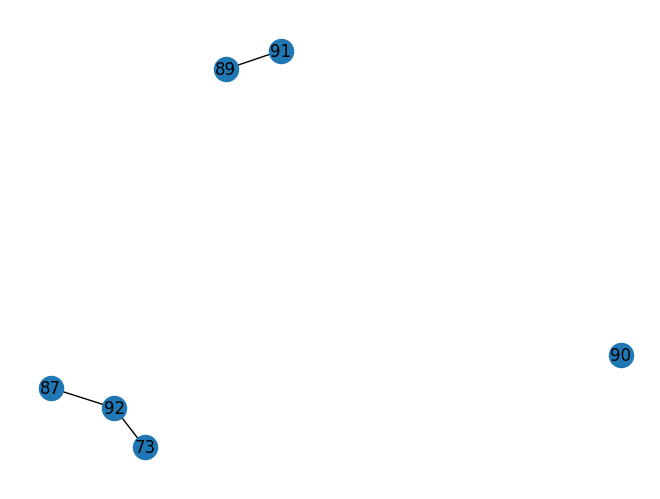

for upstream node 87, winning_node = None, error_branches = [73 89 90 91 92]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1558.6216205458122 but max skip distance was 1777.2547339923053
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0009028911590576172
Performing Edge Query
After edge filter, # of rows = 4
Exporting the edges
Deleteing edges only

--- Before Local Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  69  77    112.54   27.598187               0.232029              0.000000   
1  69  82     40.65   69.735927               0.586297              0.000248   
2  69  88     77.03   24.873760               0.264420              0.000112   
3  77  82    101.75   42.137740               0.287549              0.000248   
4  77  88     5

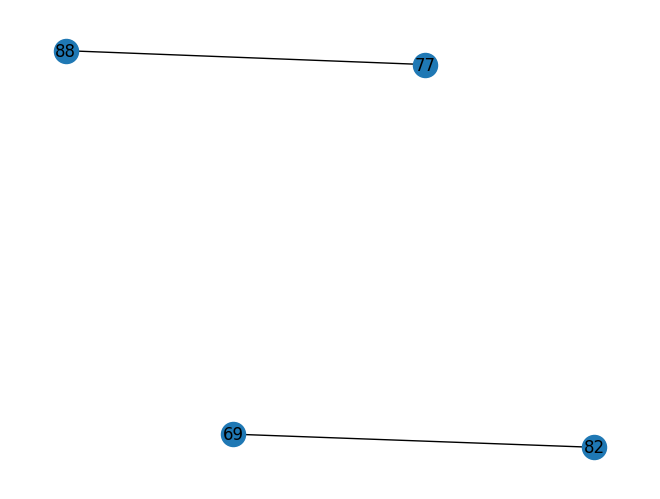

Performing global features query
Done with edge_df: 0.0011057853698730469
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  69  82     40.65   69.735927               0.586297              0.000248   
1  77  88     58.28   52.471947               0.557802              0.000112   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                1                      False                          None  
1                7                       None                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  69  82     40.65   69.735927               0.586297              0.000248   
1  77  88     58.28   52.471947               0.557802              0.000112   

   n_synapses_diff definite_partner_sk_delete definite_partner_wi

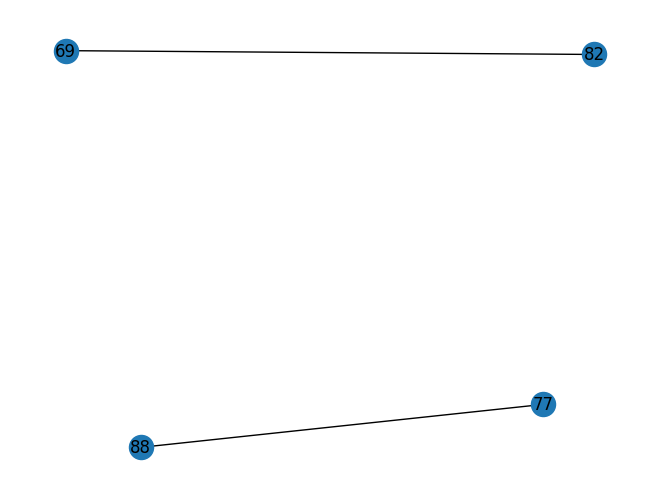

Performing node features query
Done with edge_df: 0.0007741451263427734
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  69  82     40.65   69.735927               0.586297              0.000248   
1  77  88     58.28   52.471947               0.557802              0.000112   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                1                      False                          None   
1                7                       None                          None   

  above_threshold_delete  
0                   None  
1                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  69  82     40.65   69.735927               0.586297              0.000248   
1  77  88     58.28   52.471947               0.557802             

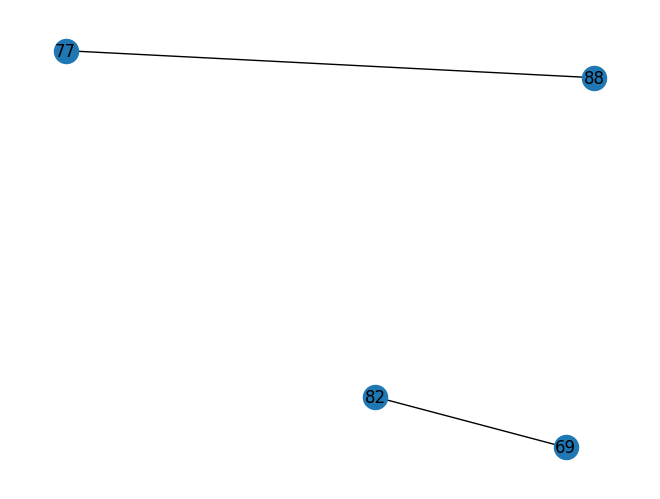

for upstream node 88, winning_node = 77, error_branches = [69 82]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (146.54113615815348) less than width_min(250)
Current node skip distance was 1692.533653628503 but max skip distance was 1692.533653628503
Current node skip distance was 1578.745325188974 but max skip distance was 1578.745325188974
Current node skip distance was 1542.1832582246798 but max skip distance was 1542.1832582246798
Current node skip distance was 1471.8380360714896 but max skip distance was 1471.8380360714896
Current node skip distance was 1529.1076968233356 but max skip distance was 1741.7928899309477
Current node skip distance was 2260.262020213133 but max skip distance was 2260.262020213133
Current node skip distance was 1505.828917486155 but max skip distance was 2260.262020213133
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))

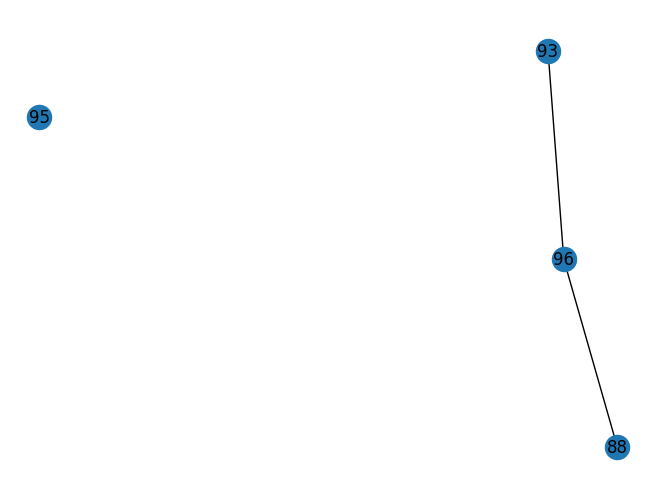

Performing global features query
Done with edge_df: 0.0007517337799072266
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  88  96     14.33   12.670249               0.155656              0.000091   
1  93  96     50.91    5.586907               0.068636              0.000020   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  
0                6                       False                          None  
1                1                        True                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  88  96     14.33   12.670249               0.155656              0.000091   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  
0                6                       False                 

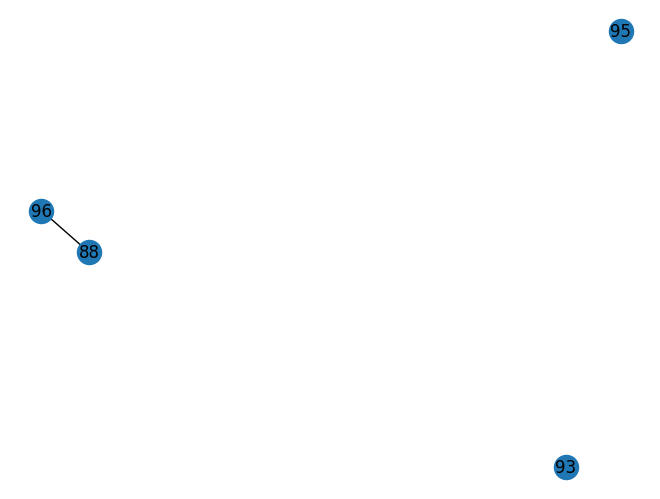

Performing node features query
Done with edge_df: 0.0007104873657226562
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  88  96     14.33   12.670249               0.155656              0.000091   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  \
0                6                       False                          None   

  above_threshold_delete  
0                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  88  96     14.33   12.670249               0.155656              0.000091   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  \
0                6                       False                          None   

  above_threshold_delete  
0                   None  


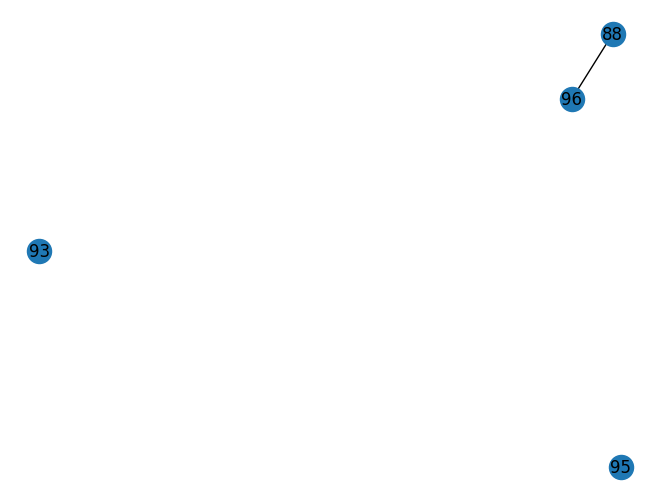

for upstream node 96, winning_node = 88, error_branches = [93 95]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (97.55504075401218) less than width_min(250)
Current node skip distance was 1654.3892959659856 but max skip distance was 1987.0475794936974
Current node skip distance was 1529.5449883497408 but max skip distance was 1529.5449883497408
Current node skip distance was 1714.031247526074 but max skip distance was 1714.031247526074
Current node skip distance was 1987.0475794936974 but max skip distance was 1987.0475794936974
Current node skip distance was 1593.0487978526676 but max skip distance was 1793.1204510958955
Current node skip distance was 1474.7194784132298 but max skip distance was 1521.2740534005507
Current node skip distance was 1517.7243823465901 but max skip distance was 1517.7243823465901
Current node skip distance was 2300 but max skip distance was 2300.0
Current node skip distance was 1614.9973770619858 but max skip distance was 1614.997

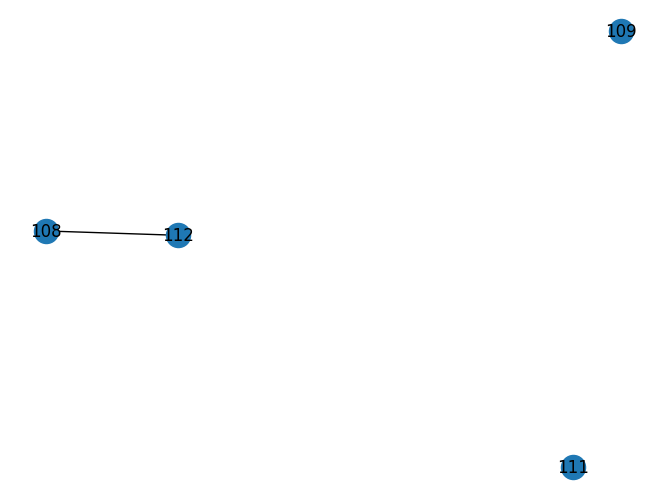

Performing global features query
Done with edge_df: 0.0008497238159179688
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  112  108     41.37   42.203666               0.413685   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000124                1                       False   

  definite_partner_width_delete  
0                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  112  108     41.37   42.203666               0.413685   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000124                1                       False   

  definite_partner_width_delete  
0                          None  


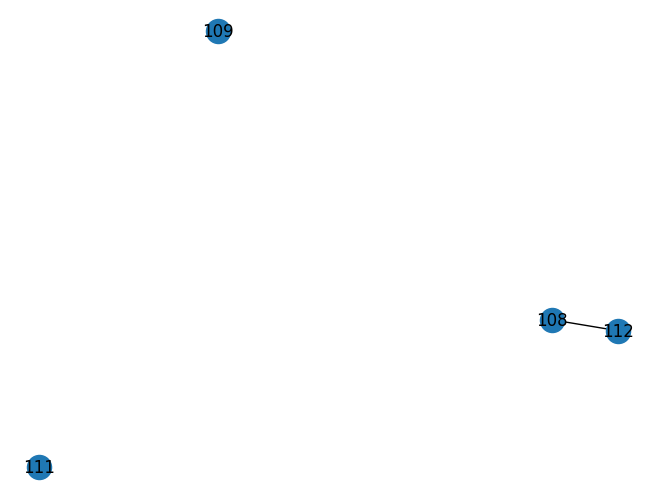

Performing node features query
Done with edge_df: 0.0008530616760253906
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  112  108     41.37   42.203666               0.413685   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000124                1                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  112  108     41.37   42.203666               0.413685   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000124                1                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  


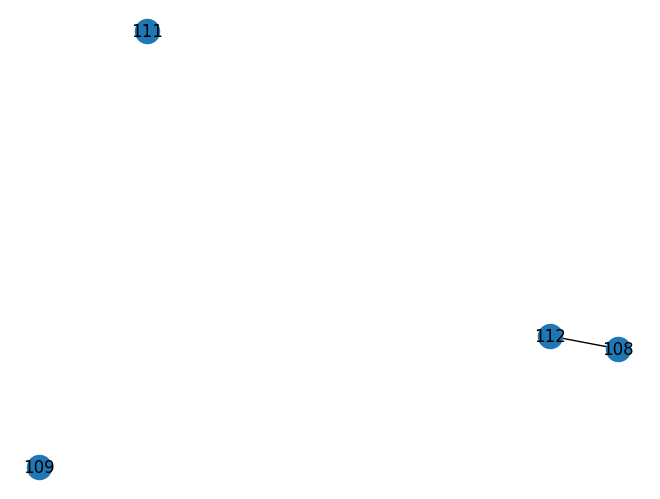

for upstream node 108, winning_node = 112, error_branches = [109 111]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (59.81510376025246) less than width_min(250)
Current node skip distance was 1558.5661985162365 but max skip distance was 1558.5661985162365
Current node skip distance was 1781.239046371689 but max skip distance was 1781.239046371689
Current node skip distance was 1463.7042418842564 but max skip distance was 1463.7042418842564
Current node skip distance was 1415.8962656677181 but max skip distance was 1415.8962656677181
Current node skip distance was 1504.0873190870434 but max skip distance was 1504.0873190870434
Current node skip distance was 1755.8093532685052 but max skip distance was 1755.8093532685052
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0010328292846679688
Performing Edge Query
After edge filter, # o

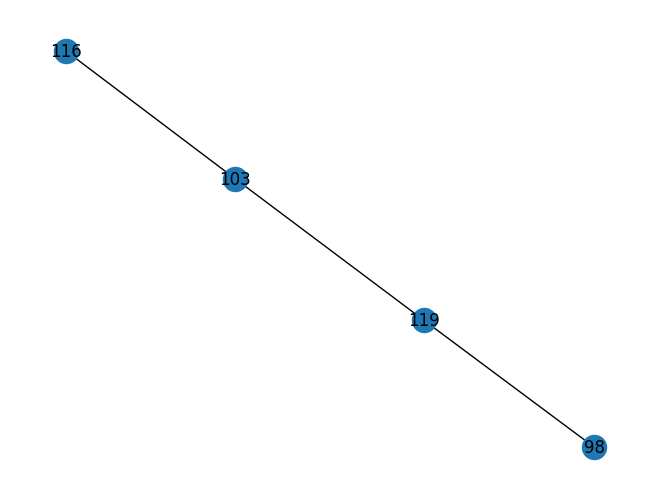

Performing global features query
Done with edge_df: 0.0007627010345458984
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0   98  119     51.47   10.531367               0.120924   
1  103  119     40.55   25.772281               0.251850   
2  103  116     41.01   39.062533               0.276267   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000075                1                       None   
1              0.000109                2                       None   
2              0.000000                0                       None   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0   98  119     51.47   10.531367               0.120924   

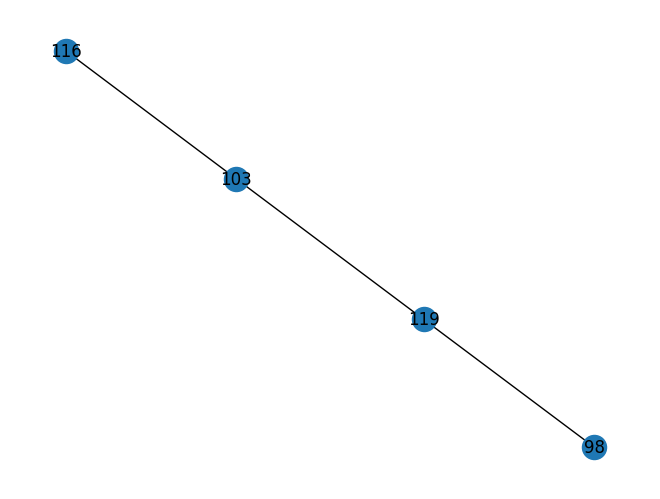

Performing node features query
Done with edge_df: 0.0007293224334716797
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0   98  119     51.47   10.531367               0.120924   
1  103  119     40.55   25.772281               0.251850   
2  103  116     41.01   39.062533               0.276267   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000075                1                       None   
1              0.000109                2                       None   
2              0.000000                0                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   True  
1                          None                   None  
2                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff

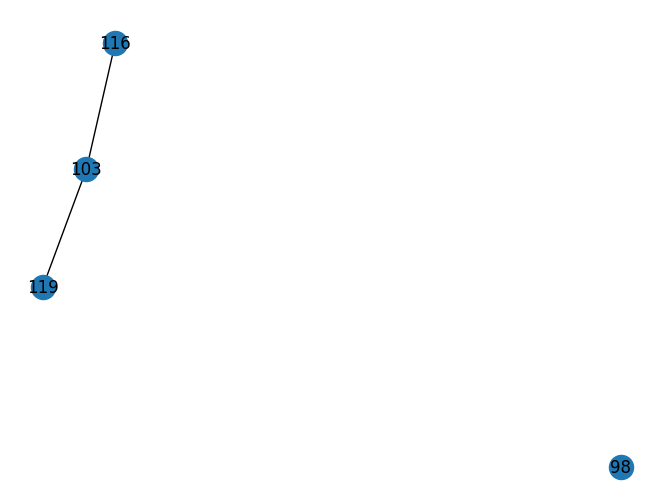

for upstream node 116, winning_node = None, error_branches = [ 98 103 119]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1680.6952947848672 but max skip distance was 2187.428259117509
Current node skip distance was 1665.0186219580419 but max skip distance was 2145.6216108747503
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0013723373413085938
Performing Edge Query
After edge filter, # of rows = 5
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  108  120     94.45    8.251548               0.080883   
1  108  122     75.40   39.451274               0.386706   
2  108  118     56.28   17.585699               0.147032   
3  120  122    159.93   31.199726               0.332736   
4  120  118    140.15  

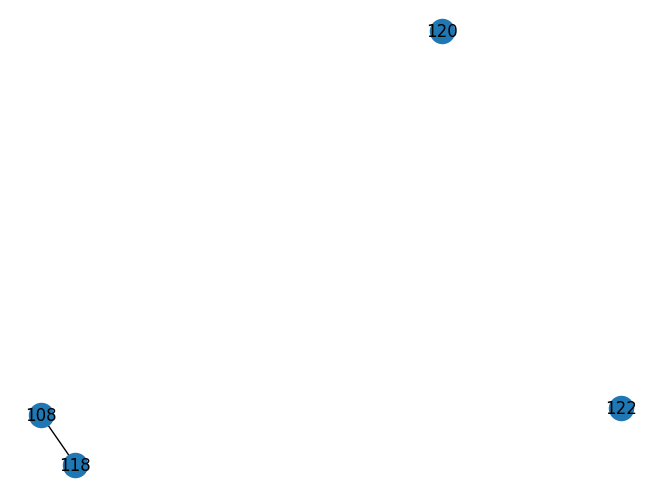

Performing global features query
Done with edge_df: 0.0007936954498291016
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  108  118     56.28   17.585699               0.147032   

   synapse_density_diff  n_synapses_diff  definite_partner_width_delete  \
0              0.000124                1                          False   

  definite_partner_sk_delete  
0                       None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  108  118     56.28   17.585699               0.147032   

   synapse_density_diff  n_synapses_diff  definite_partner_width_delete  \
0              0.000124                1                          False   

  definite_partner_sk_delete  
0                       None  


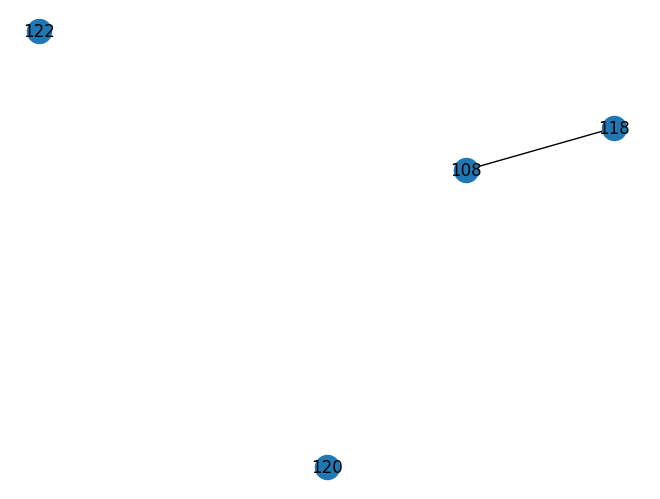

Performing node features query
Done with edge_df: 0.000858306884765625
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  108  118     56.28   17.585699               0.147032   

   synapse_density_diff  n_synapses_diff  definite_partner_width_delete  \
0              0.000124                1                          False   

  definite_partner_sk_delete above_threshold_delete  
0                       None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  108  118     56.28   17.585699               0.147032   

   synapse_density_diff  n_synapses_diff  definite_partner_width_delete  \
0              0.000124                1                          False   

  definite_partner_sk_delete above_threshold_delete  
0                       None                   None  


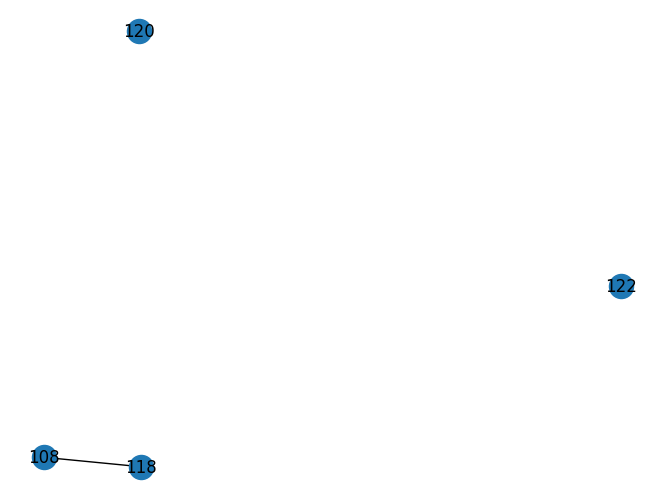

for upstream node 118, winning_node = 108, error_branches = [120 122]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (113.13074350269542) less than width_min(250)
Current node skip distance was 1485.6642933551425 but max skip distance was 1562.20265841947
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0012869834899902344
Performing Edge Query
After edge filter, # of rows = 4
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  149  151     30.73   20.642622               0.217454   
1  149  152     73.40   15.837625               0.166837   
2  149  119     96.83   18.369208               0.239934   
3  151  152    115.64    4.804997               0.064682   
4  151  119     68.71    2.273415               0.029695   
5  152  119     12.83    2.531583 

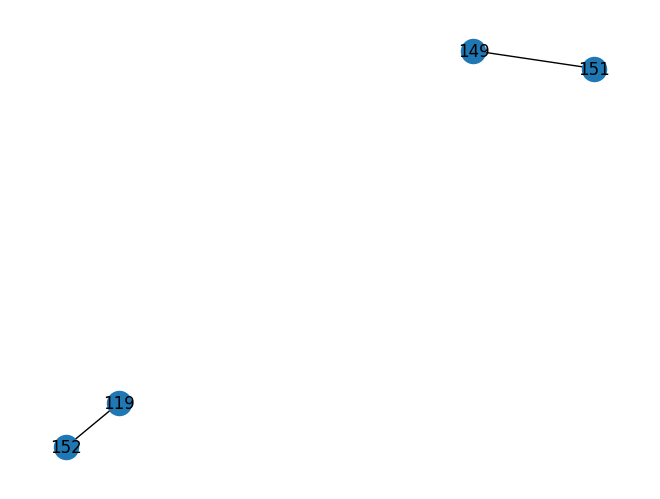

Performing global features query
Done with edge_df: 0.0010223388671875
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  149  151     30.73   20.642622               0.217454   
1  152  119     12.83    2.531583               0.033067   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000000                0                       False   
1              0.000016                2                       False   

  definite_partner_width_delete  
0                          None  
1                         False  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  149  151     30.73   20.642622               0.217454   
1  152  119     12.83    2.531583               0.033067   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000000        

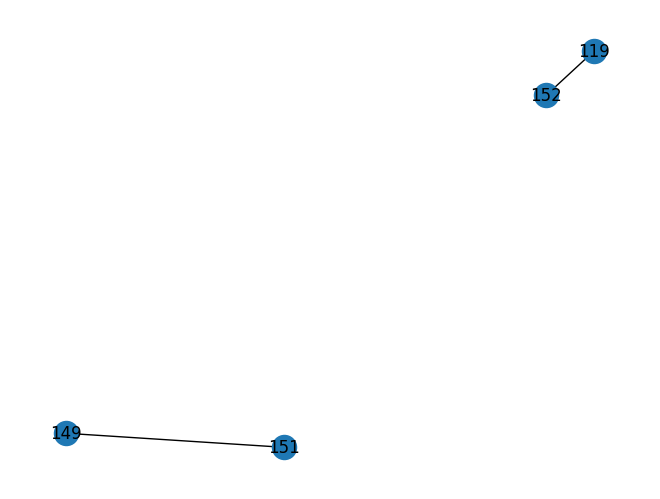

Performing node features query
Done with edge_df: 0.0008702278137207031
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  149  151     30.73   20.642622               0.217454   
1  152  119     12.83    2.531583               0.033067   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000000                0                       False   
1              0.000016                2                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                         False                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  149  151     30.73   20.642622               0.217454   
1  152  119     12.83    2.531583               0.033067   

   synapse_density_diff  n_synapses_d

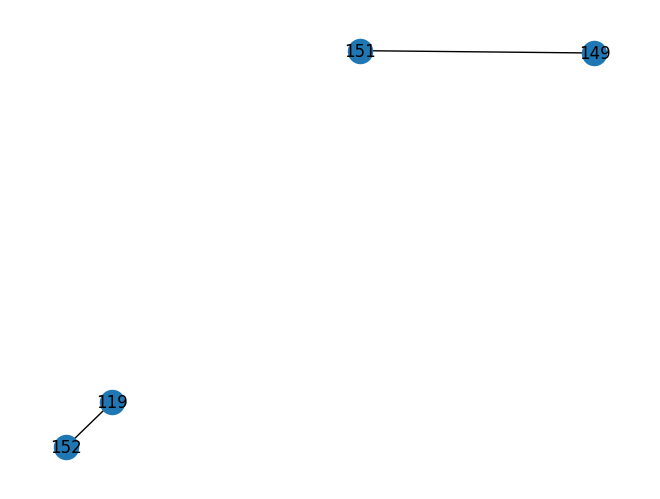

for upstream node 119, winning_node = 152, error_branches = [149 151]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (86.17594544261675) less than width_min(250)
Current node skip distance was 1557.3634258259021 but max skip distance was 1680.6952947848672
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0009391307830810547
Performing Edge Query
After edge filter, # of rows = 3
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  117  134     50.97   19.937877               0.207997   
1  117  135     26.31   23.579094               0.245983   
2  117  120    129.50    2.089420               0.022283   
3  134  135    107.21    3.641218               0.047962   
4  134  120     66.14   17.848457               0.190349   
5  135  120     38.50   21.489675

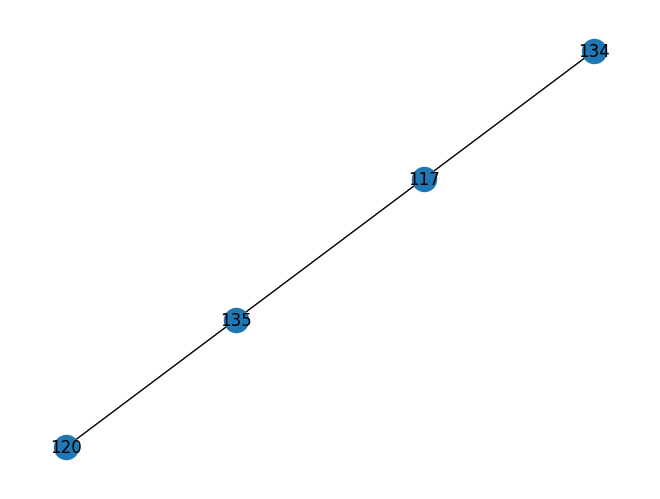

Performing global features query
Done with edge_df: 0.0007460117340087891
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  117  134     50.97   19.937877               0.207997   
1  117  135     26.31   23.579094               0.245983   
2  135  120     38.50   21.489675               0.229181   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000119                1                       None   
1              0.000032                0                       None   
2              0.000086                1                       None   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  117  134     50.97   19.937877               0.207997   

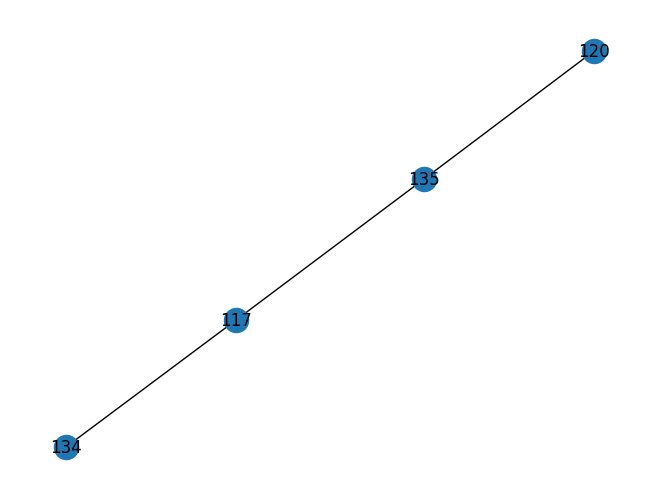

Performing node features query
Done with edge_df: 0.0007266998291015625
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  117  134     50.97   19.937877               0.207997   
1  117  135     26.31   23.579094               0.245983   
2  135  120     38.50   21.489675               0.229181   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000119                1                       None   
1              0.000032                0                       None   
2              0.000086                1                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   True  
1                          None                   None  
2                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff

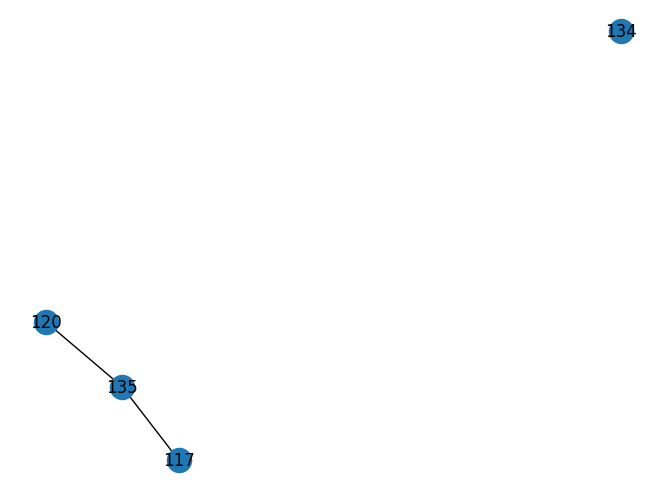

for upstream node 120, winning_node = None, error_branches = [117 134 135]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 2222.4913642393867 but max skip distance was 2222.4913642393867
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0009105205535888672
Performing Edge Query
After edge filter, # of rows = 4
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  110  123     76.31    4.485185               0.030409   
1  110  124     29.09   86.029616               0.583262   
2  110  121     82.29  145.849086               0.497191   
3  123  124     83.10   81.544432               0.570192   
4  123  121     26.58  150.334270               0.512480   
5  124  121    122.22  231.878702               0.790460 

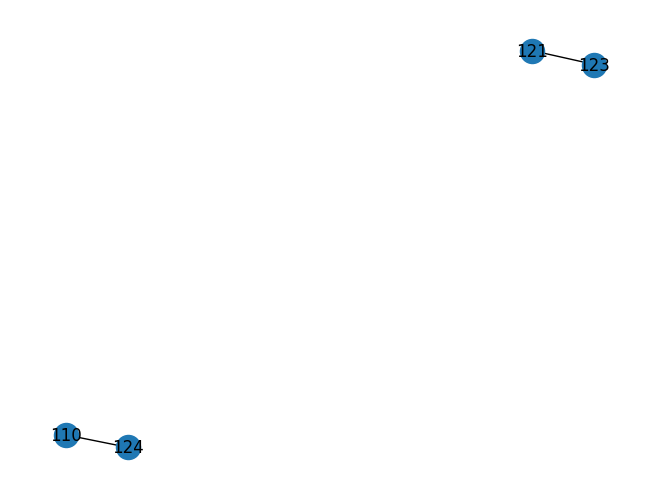

Performing global features query
Done with edge_df: 0.0007853507995605469
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  110  124     29.09   86.029616               0.583262   
1  123  121     26.58  150.334270               0.512480   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000107                1                       False   
1              0.000000                0                       False   

  definite_partner_width_delete  
0                          None  
1                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  110  124     29.09   86.029616               0.583262   
1  123  121     26.58  150.334270               0.512480   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000107     

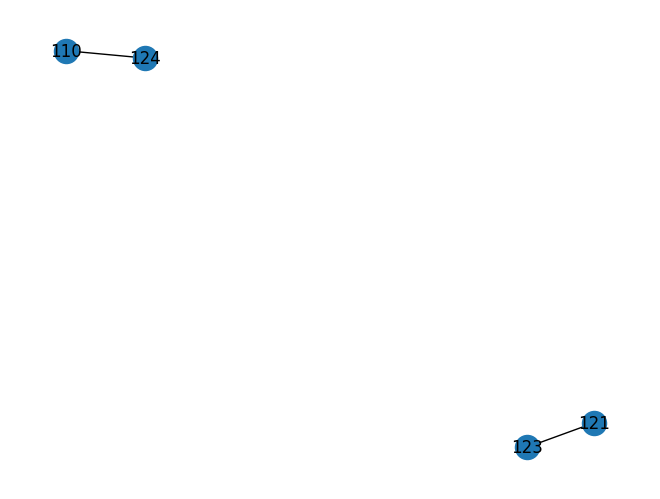

Performing node features query
Done with edge_df: 0.0008780956268310547
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  110  124     29.09   86.029616               0.583262   
1  123  121     26.58  150.334270               0.512480   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000107                1                       False   
1              0.000000                0                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  110  124     29.09   86.029616               0.583262   
1  123  121     26.58  150.334270               0.512480   

   synapse_density_diff  n_synapses_d

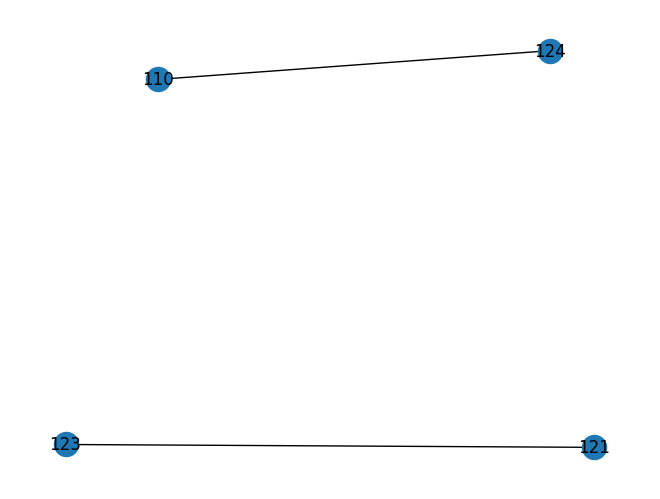

for upstream node 121, winning_node = 123, error_branches = [110 124]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (143.01218658338797) less than width_min(250)
Current node skip distance was 1427.364565567501 but max skip distance was 1427.364565567501
Current node skip distance was 1762.5507774307825 but max skip distance was 2076.380641088071
Current node skip distance was 1422.7823118140598 but max skip distance was 1422.7823118140598
Current node skip distance was 1451.9504876031956 but max skip distance was 1451.9504876031956
Current node skip distance was 2076.380641088071 but max skip distance was 2076.380641088071
Current node skip distance was 1556.065657251308 but max skip distance was 1556.065657251308
Current node skip distance was 1548.7755299281114 but max skip distance was 2142.1063878645527
Current node skip distance was 1449.235144763992 but max skip distance was 1449.235144763992
Current node skip distance was 1906.2663347269172 but max sk

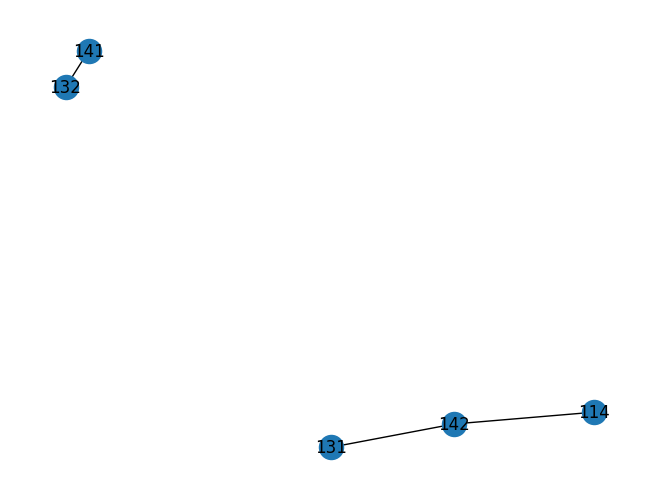

Performing global features query
Done with edge_df: 0.0009684562683105469
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  114  142     14.12   27.746893               0.342635   
1  131  142     14.97   14.582371               0.215027   
2  141  132      6.99   69.602713               0.392119   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0                   0.0                0                       None   
1                   0.0                0                       None   
2                   0.0                0                      False   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  114  142     14.12   27.746893               0.342635   

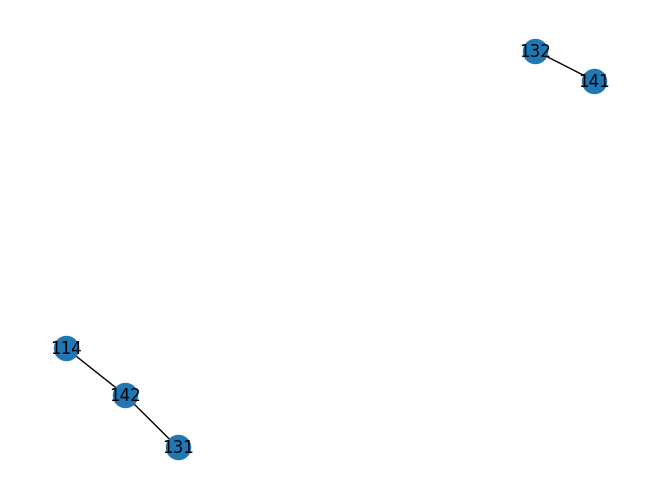

Performing node features query
Done with edge_df: 0.0007772445678710938
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  114  142     14.12   27.746893               0.342635   
1  131  142     14.97   14.582371               0.215027   
2  141  132      6.99   69.602713               0.392119   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0                   0.0                0                       None   
1                   0.0                0                       None   
2                   0.0                0                      False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None                   None  
2                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff

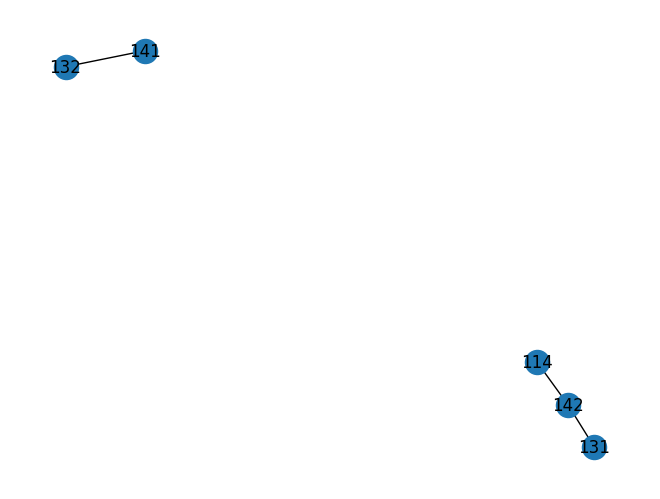

for upstream node 132, winning_node = 141, error_branches = [114 131 142]
Inside high_degree_false_positive_low_sibling_filter ****
Not exactly 2 downstream errors so returning
Current node skip distance was 1844.3747246878115 but max skip distance was 1906.2663347269172
Current node skip distance was 1482.9948556593406 but max skip distance was 1482.9948556593406
Current node skip distance was 1467.8231152466783 but max skip distance was 1467.8231152466783
Current node skip distance was 1963.9243838618418 but max skip distance was 1963.9243838618418
Current node skip distance was 1438.6446821350578 but max skip distance was 1438.6446821350578
Current node skip distance was 2300 but max skip distance was 2300.0
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0010745525360107422
Performing Edge Query
After edge filter, # of rows = 7
Exporting the edges
Dele

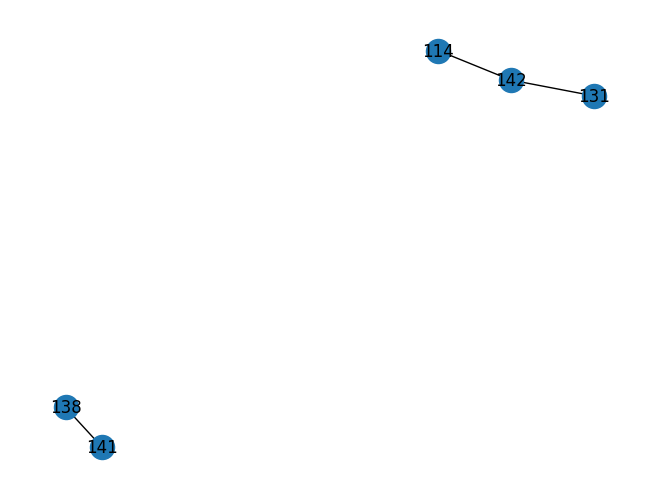

Performing global features query
Done with edge_df: 0.000980377197265625
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  114  142     14.12   27.746893               0.342635   
1  131  142     14.97   14.582371               0.215027   
2  141  138      8.36  109.188065               0.502964   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0                   0.0                0                       None   
1                   0.0                0                       None   
2                   0.0                0                      False   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  114  142     14.12   27.746893               0.342635   


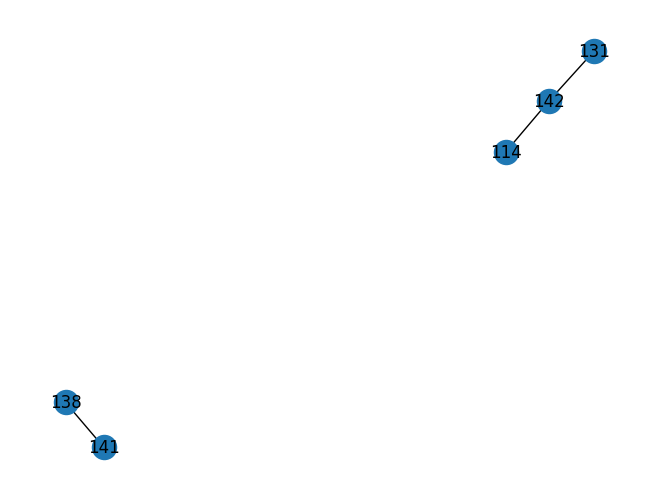

Performing node features query
Done with edge_df: 0.0008835792541503906
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  114  142     14.12   27.746893               0.342635   
1  131  142     14.97   14.582371               0.215027   
2  141  138      8.36  109.188065               0.502964   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0                   0.0                0                       None   
1                   0.0                0                       None   
2                   0.0                0                      False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None                   None  
2                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff

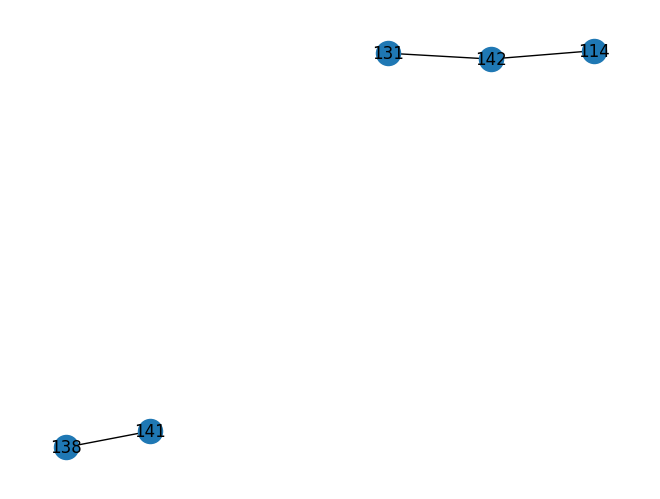

for upstream node 138, winning_node = 141, error_branches = [114 131 142]
Inside high_degree_false_positive_low_sibling_filter ****
Not exactly 2 downstream errors so returning
Current node skip distance was 1616.2550294890975 but max skip distance was 1616.2550294890975
Current node skip distance was 1388.4752639608032 but max skip distance was 1388.4752639608032
Current node skip distance was 1799.7161098737784 but max skip distance was 1844.3747246878115
Current node skip distance was 1521.2740534005507 but max skip distance was 1521.2740534005507
Current node skip distance was 1829.4403823438415 but max skip distance was 1829.4403823438415
Current node skip distance was 1421.724095731764 but max skip distance was 1587.281058495119
Current node skip distance was 1562.20265841947 but max skip distance was 1562.20265841947
Current node skip distance was 1559.0268320131295 but max skip distance was 1559.0268320131295
Current node skip distance was 1476.1917328180928 but max skip distan

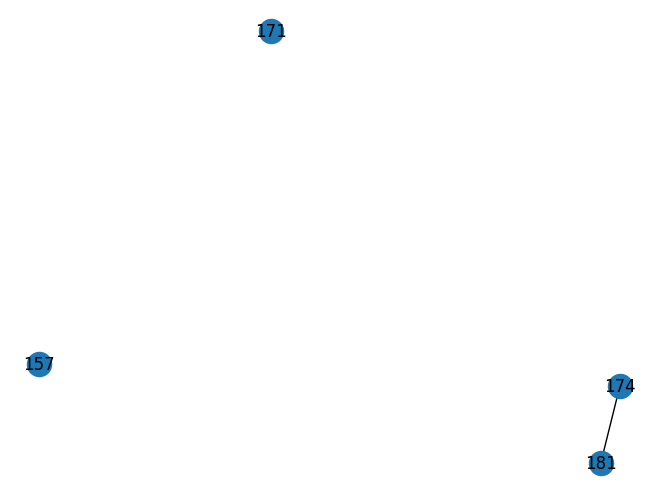

Performing global features query
Done with edge_df: 0.0006647109985351562
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  174  181      6.21    1.322655               0.006339   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0                   0.0                0                       False   

   definite_partner_width_delete  
0                          False  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  174  181      6.21    1.322655               0.006339   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0                   0.0                0                       False   

   definite_partner_width_delete  
0                          False  


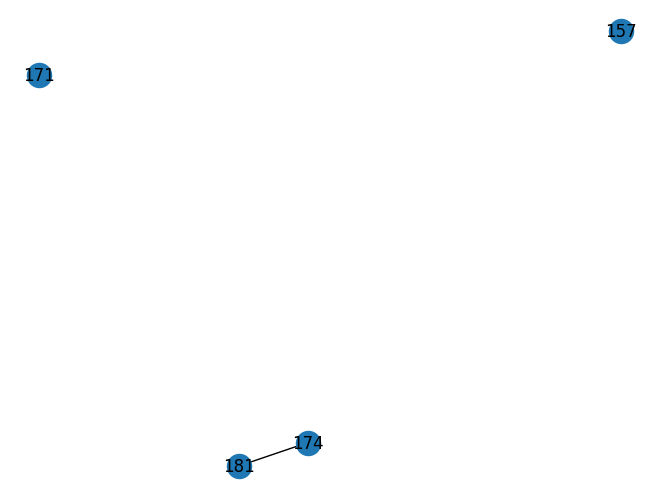

Performing node features query
Done with edge_df: 0.0007150173187255859
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  174  181      6.21    1.322655               0.006339   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0                   0.0                0                       False   

   definite_partner_width_delete above_threshold_delete  
0                          False                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  174  181      6.21    1.322655               0.006339   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0                   0.0                0                       False   

   definite_partner_width_delete above_threshold_delete  
0                          False                   None  


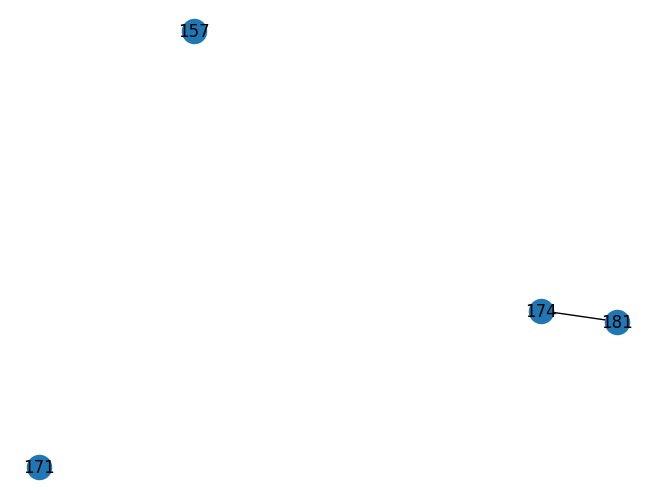

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1839.1475043627702 but max skip distance was 1839.1475043627702
Current node skip distance was 1511.0853901626754 but max skip distance was 1839.1475043627702
Current node skip distance was 1545.639811575495 but max skip distance was 1545.639811575495
Current node skip distance was 1679.9988534814543 but max skip distance was 1679.9988534814543
Current node skip distance was 1547.5571932935732 but max skip distance was 1679.9988534814543
Current node skip distance was 1768.976074228231 but max skip distance was 1768.976074228231
Current node skip distance was 1528.327643905881 but max skip distance was 1528.327643905881
Current node skip distance was 1443.4813042766386 but max skip distance was 1768.976074228231
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))

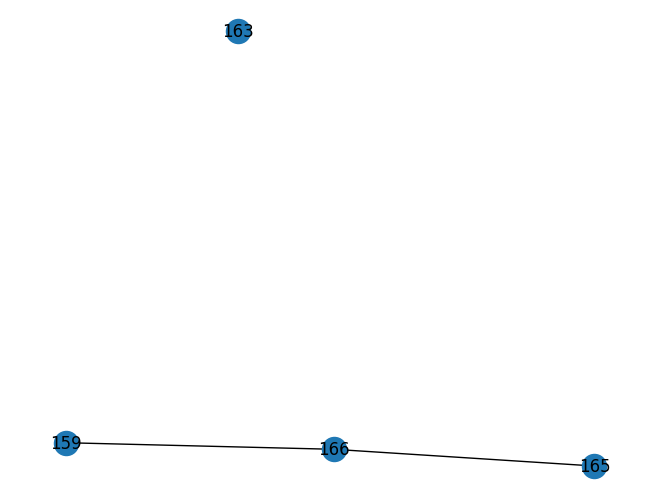

Performing global features query
Done with edge_df: 0.0007231235504150391
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  159  166     37.49   13.197348               0.159657   
1  166  165     62.35    3.027633               0.045573   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000029                1                       None   
1              0.000117                0                       None   

  definite_partner_width_delete  
0                          None  
1                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  159  166     37.49   13.197348               0.159657   
1  166  165     62.35    3.027633               0.045573   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000029         

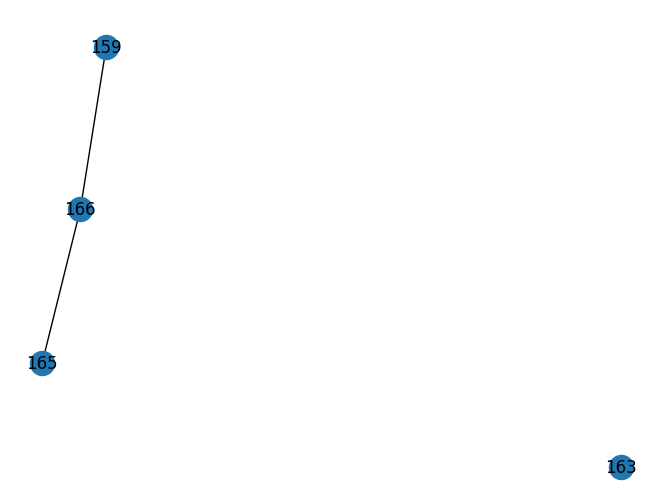

Performing node features query
Done with edge_df: 0.0008442401885986328
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  159  166     37.49   13.197348               0.159657   
1  166  165     62.35    3.027633               0.045573   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000029                1                       None   
1              0.000117                0                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None                   True  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  159  166     37.49   13.197348               0.159657   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000029      

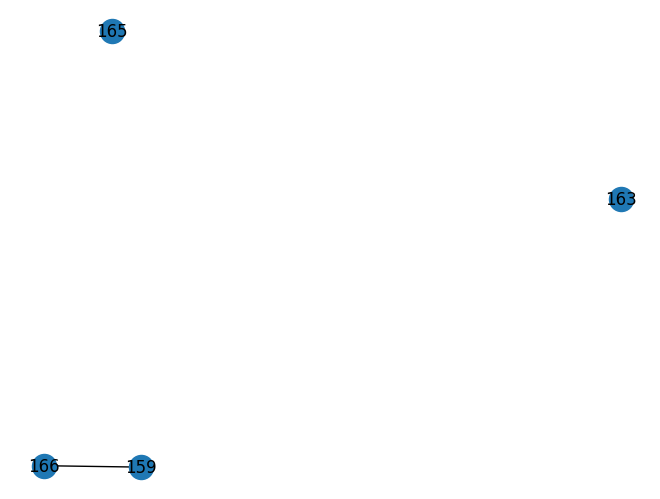

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1456.096439990625 but max skip distance was 1456.096439990625
Current node skip distance was 1438.7677292204708 but max skip distance was 1438.7677292204708
Current node skip distance was 1475.2074182305826 but max skip distance was 1823.5915015780708
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0009202957153320312
Performing Edge Query
After edge filter, # of rows = 5
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  160  165    150.60   24.518042               0.269567   
1  160  175      5.52   66.708406               0.733434   
2  160  168    145.72   16.903774               0.228276   
3  165  175     32.25   91.226447               1.373158   
4  1

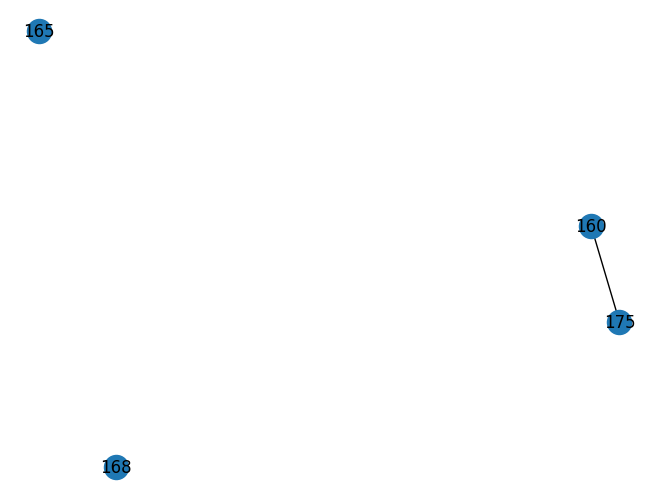

Performing global features query
Done with edge_df: 0.0009980201721191406
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  160  175      5.52   66.708406               0.733434   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000058                1                       False   

  definite_partner_width_delete  
0                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  160  175      5.52   66.708406               0.733434   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000058                1                       False   

  definite_partner_width_delete  
0                          None  


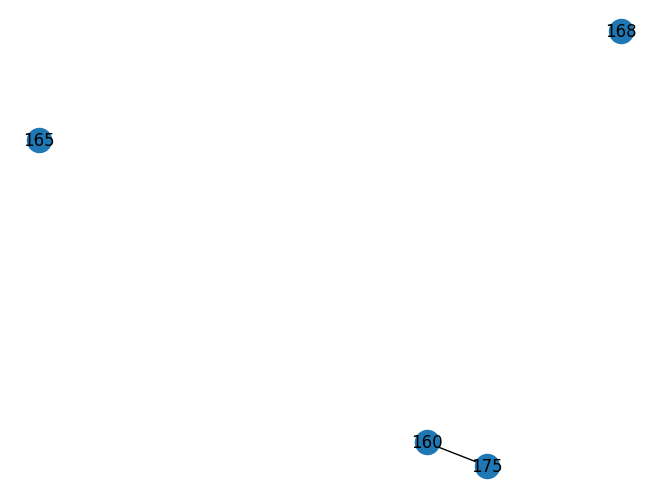

Performing node features query
Done with edge_df: 0.0006825923919677734
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  160  175      5.52   66.708406               0.733434   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000058                1                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  160  175      5.52   66.708406               0.733434   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000058                1                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  


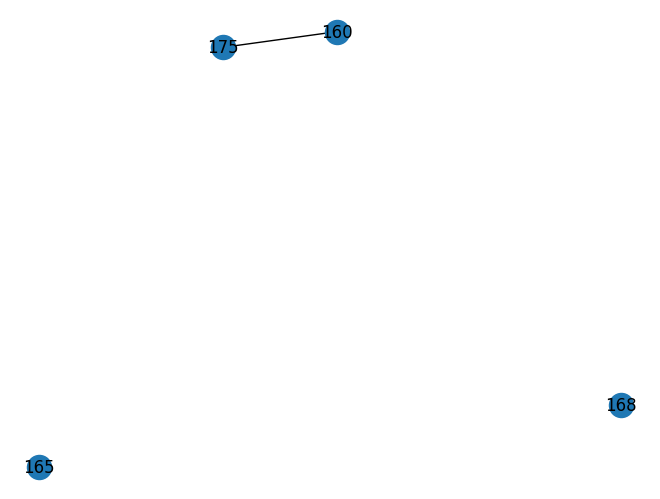

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1499.8793134527978 but max skip distance was 1499.8793134527978
Current node skip distance was 1620.256694044604 but max skip distance was 1620.256694044604
Current node skip distance was 1396.8979969577265 but max skip distance was 1545.639811575495
Current node skip distance was 2036.0125751141773 but max skip distance was 2300.0
Current node skip distance was 1823.5915015780708 but max skip distance was 1823.5915015780708
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0017156600952148438
Performing Edge Query
After edge filter, # of rows = 6
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  176  180      6.40    5.328512               0.092817   
1  176 

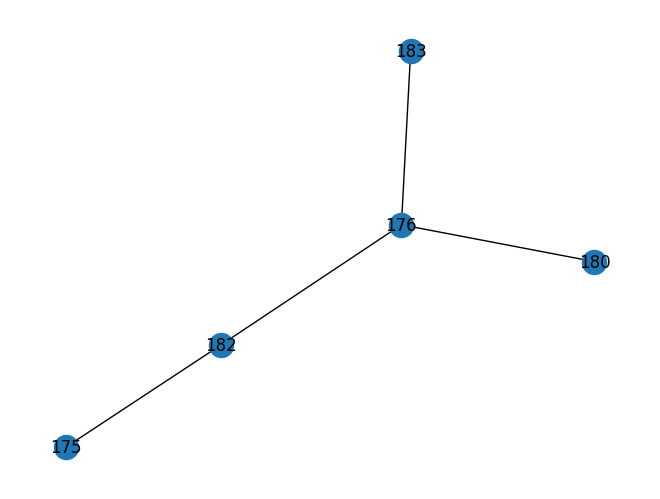

Performing global features query
Done with edge_df: 0.001140594482421875
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  176  180      6.40    5.328512               0.092817   
1  176  182     54.70   44.139437               0.768864   
2  176  183      8.95    4.869116               0.084815   
3  182  175     64.98   56.113901               0.355913   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000000                0                       None   
1              0.000243                1                       None   
2              0.000000                0                       None   
3              0.000243                1                       None   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
3        

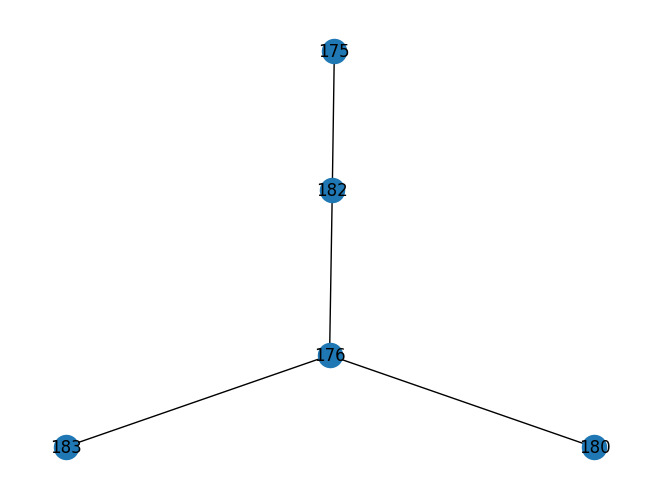

Performing node features query
Done with edge_df: 0.0009472370147705078
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  176  180      6.40    5.328512               0.092817   
1  176  182     54.70   44.139437               0.768864   
2  176  183      8.95    4.869116               0.084815   
3  182  175     64.98   56.113901               0.355913   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000000                0                       None   
1              0.000243                1                       None   
2              0.000000                0                       None   
3              0.000243                1                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None   

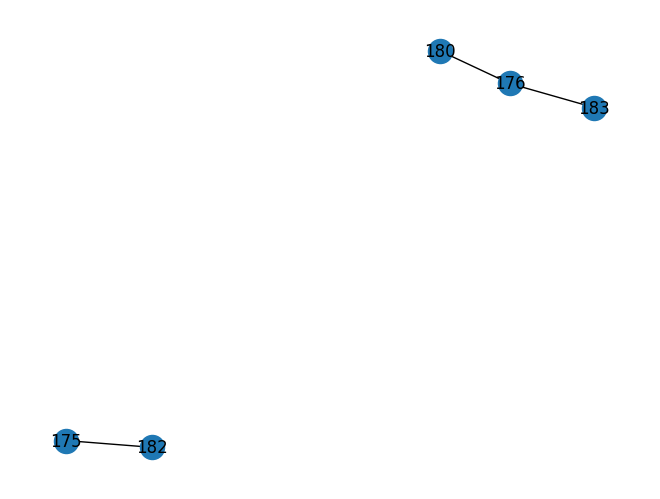

for upstream node 175, winning_node = 182, error_branches = [176 180 183]
Inside high_degree_false_positive_low_sibling_filter ****
Not exactly 2 downstream errors so returning
Current node skip distance was 1405.8692599063027 but max skip distance was 1405.8692599063027
Current node skip distance was 2300 but max skip distance was 2300.0
Current node skip distance was 1645.6577179316328 but max skip distance was 1645.6577179316328
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0013561248779296875
Performing Edge Query
After edge filter, # of rows = 2
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  176  182     54.70   44.139437               0.768864   
1  176  183      8.95    4.869116               0.084815   
2  176  179    165.29   57.549230               0.500612   


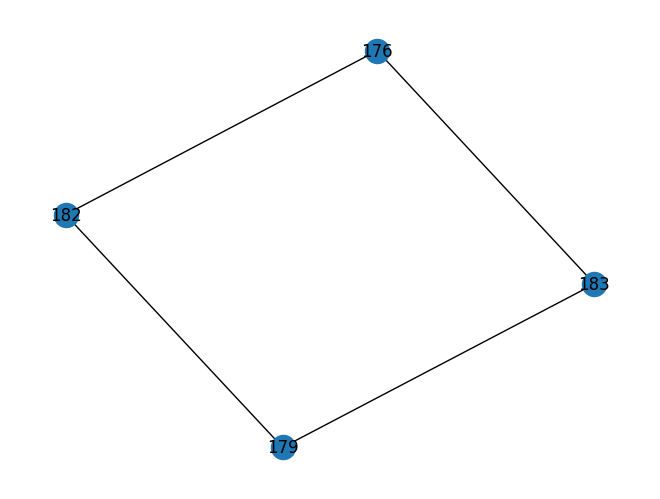

Performing global features query
Done with edge_df: 0.0007655620574951172
Performing Edge Query
After edge filter, # of rows = 2
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  176  182     54.70   44.139437               0.768864   
1  176  183      8.95    4.869116               0.084815   
2  182  179     57.59   13.409793               0.116650   
3  183  179     22.87   62.418345               0.542967   

   synapse_density_diff  n_synapses_diff  definite_partner_width_delete  \
0              0.000243                1                           True   
1              0.000000                0                          False   
2              0.000243                1                          False   
3              0.000000                0                           True   

  definite_partner_sk_delete  
0                       None  
1                       None  
2                       None  


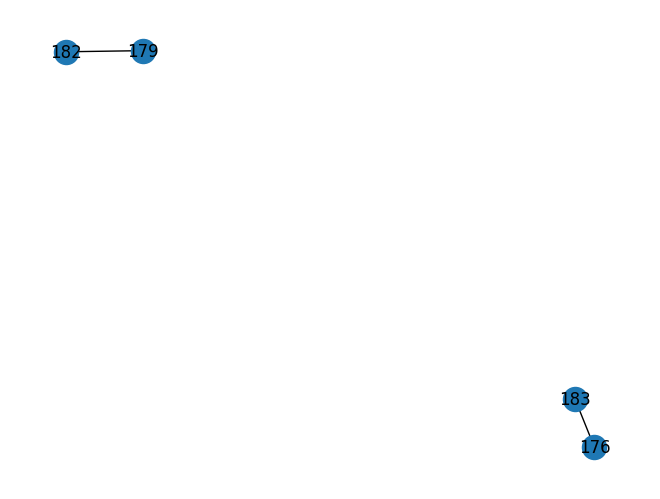

Performing node features query
Done with edge_df: 0.0007822513580322266
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  176  183      8.95    4.869116               0.084815   
1  182  179     57.59   13.409793               0.116650   

   synapse_density_diff  n_synapses_diff  definite_partner_width_delete  \
0              0.000000                0                          False   
1              0.000243                1                          False   

  definite_partner_sk_delete above_threshold_delete  
0                       None                   None  
1                       None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  176  183      8.95    4.869116               0.084815   
1  182  179     57.59   13.409793               0.116650   

   synapse_density_diff  n_synapses_d

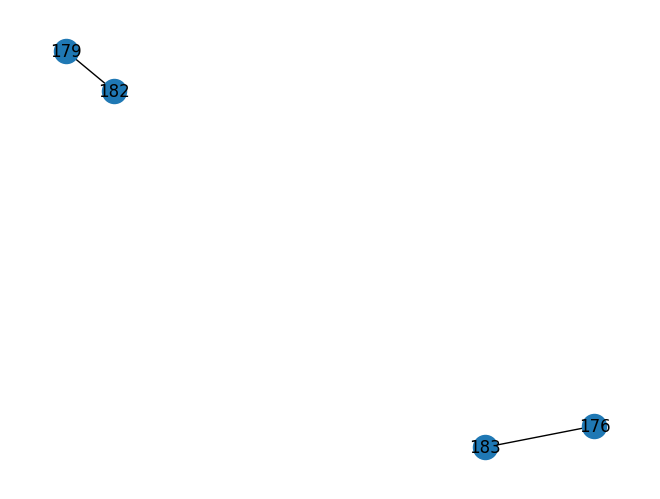

for upstream node 179, winning_node = 182, error_branches = [176 183]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (101.54805929174576) less than width_min(250)
Current node skip distance was 1428.0713915564047 but max skip distance was 1428.0713915564047
Current node skip distance was 2154.354887305937 but max skip distance was 2300.0
Current node skip distance was 1589.7835803822734 but max skip distance was 1589.7835803822734
Current node skip distance was 1385.5812786224683 but max skip distance was 1385.5812786224683
Current node skip distance was 2072.3218471761174 but max skip distance was 2072.3218471761174
Current node skip distance was 1907.1869472675644 but max skip distance was 1907.1869472675644
limb_branch_dict_to_cancel = {'L3': array([105, 115, 102, 104, 145, 178, 147, 177, 150, 153, 156, 157, 152,
       173, 168, 167, 179, 182, 184, 185, 187, 189, 186, 188,  96,  65,
        64,  67,  71,  74,  77,  85,  88, 154, 155, 158, 161, 162, 164,
  

In [98]:
neuron_obj_proof = npu.auto_proof_stage(
    neuron_obj_axon,
    mesh_decimated = mesh_decimated,
    calculate_after_proof_stats = False,
)

In [99]:
_ = npu.after_auto_proof_stats(
    neuron_obj_proof,
    store_in_obj = True,
)


Working on compartment basal---
Compartment limb stats = {'n_limbs': 4, 'soma_angle_max': 126.04, 'soma_angle_min': 90.34}

Working on compartment apical_total---
Compartment limb stats = {'n_limbs': 1, 'soma_angle_max': 31.61, 'soma_angle_min': 31.61}

Working on compartment axon---
Compartment limb stats = {'n_limbs': 1, 'soma_angle_max': 156.14, 'soma_angle_min': 156.14}

Working on compartment dendrite---
Compartment limb stats = {'n_limbs': 5, 'soma_angle_max': 126.04, 'soma_angle_min': 31.61}


In [100]:
G_proof = neuron_obj_proof.neuron_graph_after_proof
G_proof

In [102]:
G_proof.nodes['S0']

{'area': 501.5465539695098,
 'compartment': 'soma',
 'mesh_center': array([ 553530.16919005,  749849.81538185, 1047455.00113064]),
 'endpoint_upstream': array([ 553530.16919005,  749849.81538185, 1047455.00113064]),
 'n_synapses': 53,
 'n_synapses_post': 52,
 'n_synapses_pre': 1,
 'sdf': 0.779125,
 'side_length_ratios': [1.0025436846486662,
  1.10048012354632,
  1.0976879515549238],
 'volume_ratio': 4.8422832831441704,
 'mesh_volume': 1083.0631353799831}

In [ ]:
"""
Use max soma volume on the graph
"""

# Saving off the autoproofread neuron

In [104]:
vdi.save_neuron_obj_auto_proof(
    neuron_obj_proof,
)

'/neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/864691134917511946_auto_proof.pbz2'

In [ ]:
n_obj_proofread_recovered = vdi.load_neuron_obj_auto_proof(segment_id)

# Plotting the final neuron

In [ ]:
from neurd import synapse_utils as syu

In [ ]:
from datasci_tools import ipyvolume_utils as ipvu
ipvu.plot_objects(
    neuron_obj_axon.mesh,
    meshes = [neuron_obj_proof.mesh],
    meshes_colors="red"
)

In [ ]:
syu.plot_synapses(neuron_obj_proof)

In [ ]:
syu.plot_synapses_error_from_neuron_obj(neuron_obj_proof)    

In [ ]:
syu.plot_synapses_valid_from_neuron_obj(neuron_obj_proof)  

In [ ]:
nviz.plot_compartments(neuron_obj_proof)

In [ ]:
%load_ext autoreload
%autoreload 2